In [1]:
 ## -*- coding: utf-8 -*- 
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#credits存放电影的演职员名单
credits=pd.read_csv("tmdb_5000_credits.csv")
#movies存放电影的基本信息
movies=pd.read_csv("tmdb_5000_movies.csv")

In [3]:
credits.describe()

movie_id
count    4803.000000
mean    57165.484281
std     88694.614033
min         5.000000
25%      9014.500000
50%     14629.000000
75%     58610.500000
max    459488.000000

In [4]:
movies.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

In [5]:
#删去重复列
del credits['title']
#合并
total=pd.merge(movies,credits,left_on='id',right_on='movie_id',how='left')

In [6]:
#除去不在分析范围的字段
total.drop(['homepage','id','original_language','original_title','overview',
          'spoken_languages','status','tagline','cast','crew','movie_id'],
           axis=1,inplace=True)

In [7]:
total[total.release_date.isnull()]

budget genres keywords  popularity production_companies  \
4553       0     []       []         0.0                   []   

     production_countries release_date  revenue  runtime  \
4553                   []          NaN        0      0.0   

                           title  vote_average  vote_count  
4553  America Is Still the Place           0.0           0

In [8]:
total.release_date=total.release_date.fillna("2014-06-01")

In [9]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 12 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
keywords                4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4803 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 487.8+ KB


In [10]:
total[total.runtime.isnull()]

budget                               genres  \
2656  15000000        [{"id": 18, "name": "Drama"}]   
4140         2  [{"id": 99, "name": "Documentary"}]   

                                               keywords  popularity  \
2656  [{"id": 717, "name": "pope"}, {"id": 5565, "na...    0.738646   
4140  [{"id": 6027, "name": "music"}, {"id": 225822,...    0.050625   

                                  production_companies  \
2656            [{"name": "Taodue Film", "id": 45724}]   
4140  [{"name": "Eyeline Entertainment", "id": 60343}]   

                                  production_countries release_date  revenue  \
2656           [{"iso_3166_1": "IT", "name": "Italy"}]   2015-12-03        0   
4140  [{"iso_3166_1": "GB", "name": "United Kingdom"}]   2015-12-12        0   

      runtime                                       title  vote_average  \
2656      NaN  Chiamatemi Francesco - Il Papa della gente           7.3   
4140      NaN                 To Be Frank, Sinatra at 100           0.0   

      vote_count  
2656          12  
4140           0

In [11]:
total.runtime=total.runtime.fillna(94,limit=1)
total.runtime=total.runtime.fillna(240,limit=1)

In [12]:
# total['vote_count'].value_counts()

In [13]:
#异常值处理,用平均值填充
total['budget']=total['budget'].replace(0,total['budget'].mean())
total['revenue']=total['revenue'].replace(0,total['revenue'].mean())
total['vote_average']=total['vote_average'].replace(0,total['vote_average'].mean())
total['vote_count']=total['vote_count'].replace(0,total['vote_count'].mean())

In [14]:
total.release_date.head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [15]:
total.release_date=pd.to_datetime(total.release_date,format='%Y-%m-%d',errors='coerce').dt.year

In [16]:
total.release_date.head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: release_date, dtype: int64

In [17]:
json_column=['genres','keywords','production_companies','production_countries']
for column in json_column:
    total[column]=total[column].map(json.loads)
def getname(x):
    list=[]
    for i in x:
        list.append(i['name'])
    return '|'.join(list)
for column in json_column:
    total[column]=total[column].map(getname)
total.head(2)

budget                                    genres  \
0  237000000.0  Action|Adventure|Fantasy|Science Fiction   
1  300000000.0                  Adventure|Fantasy|Action   

                                            keywords  popularity  \
0  culture clash|future|space war|space colony|so...  150.437577   
1  ocean|drug abuse|exotic island|east india trad...  139.082615   

                                production_companies  \
0  Ingenious Film Partners|Twentieth Century Fox ...   
1  Walt Disney Pictures|Jerry Bruckheimer Films|S...   

                      production_countries  release_date       revenue  \
0  United States of America|United Kingdom          2009  2.787965e+09   
1                 United States of America          2007  9.610000e+08   

   runtime                                     title  vote_average  vote_count  
0    162.0                                    Avatar           7.2     11800.0  
1    169.0  Pirates of the Caribbean: At World's End           6.9      4500.0

In [18]:
#数据分析及可视化
#（一）各电影类型数量分布及随时间变化趋势如何？①随时间推移如何发生变化的？

In [19]:
genre_set=set()
for x in total['genres']:
    genre_set.update(x.split("|"))
genre_set.discard("")
genre_df=pd.DataFrame()
for genre in genre_set:
    genre_df[genre]=total['genres'].str.contains(genre).map(lambda x:1 if x else 0)

In [20]:
genre_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [21]:
genre_df['release_date']=total['release_date']
genre_by_year=genre_df.groupby('release_date').sum()
genre_by_year.tail()

Science Fiction  Mystery  Fantasy  Foreign  Adventure  History  \
release_date                                                                   
2013                       27        5       21        0         36        8   
2014                       26       15       16        0         37        7   
2015                       28       20       10        0         35        9   
2016                       11        6       13        0         23        6   
2017                        0        0        0        0          0        0   

              Action  Family  Animation  Thriller  Music  Documentary  Comedy  \
release_date                                                                    
2013              56      22         17        53     12           10      71   
2014              54      23         14        66      9            7      62   
2015              46      17         13        67      8            7      52   
2016              39       9          4        27      1            0      26   
2017               0       1          0         0      0            0       1   

              TV Movie  Drama  Horror  Western  War  Crime  Romance  
release_date                                                         
2013                 2    110      25        1    3     37       25  
2014                 0    110      21        3   10     27       24  
2015                 0     95      33        7    2     26       23  
2016                 0     37      20        1    3     10        9  
2017                 0      1       0        0    0      0        0

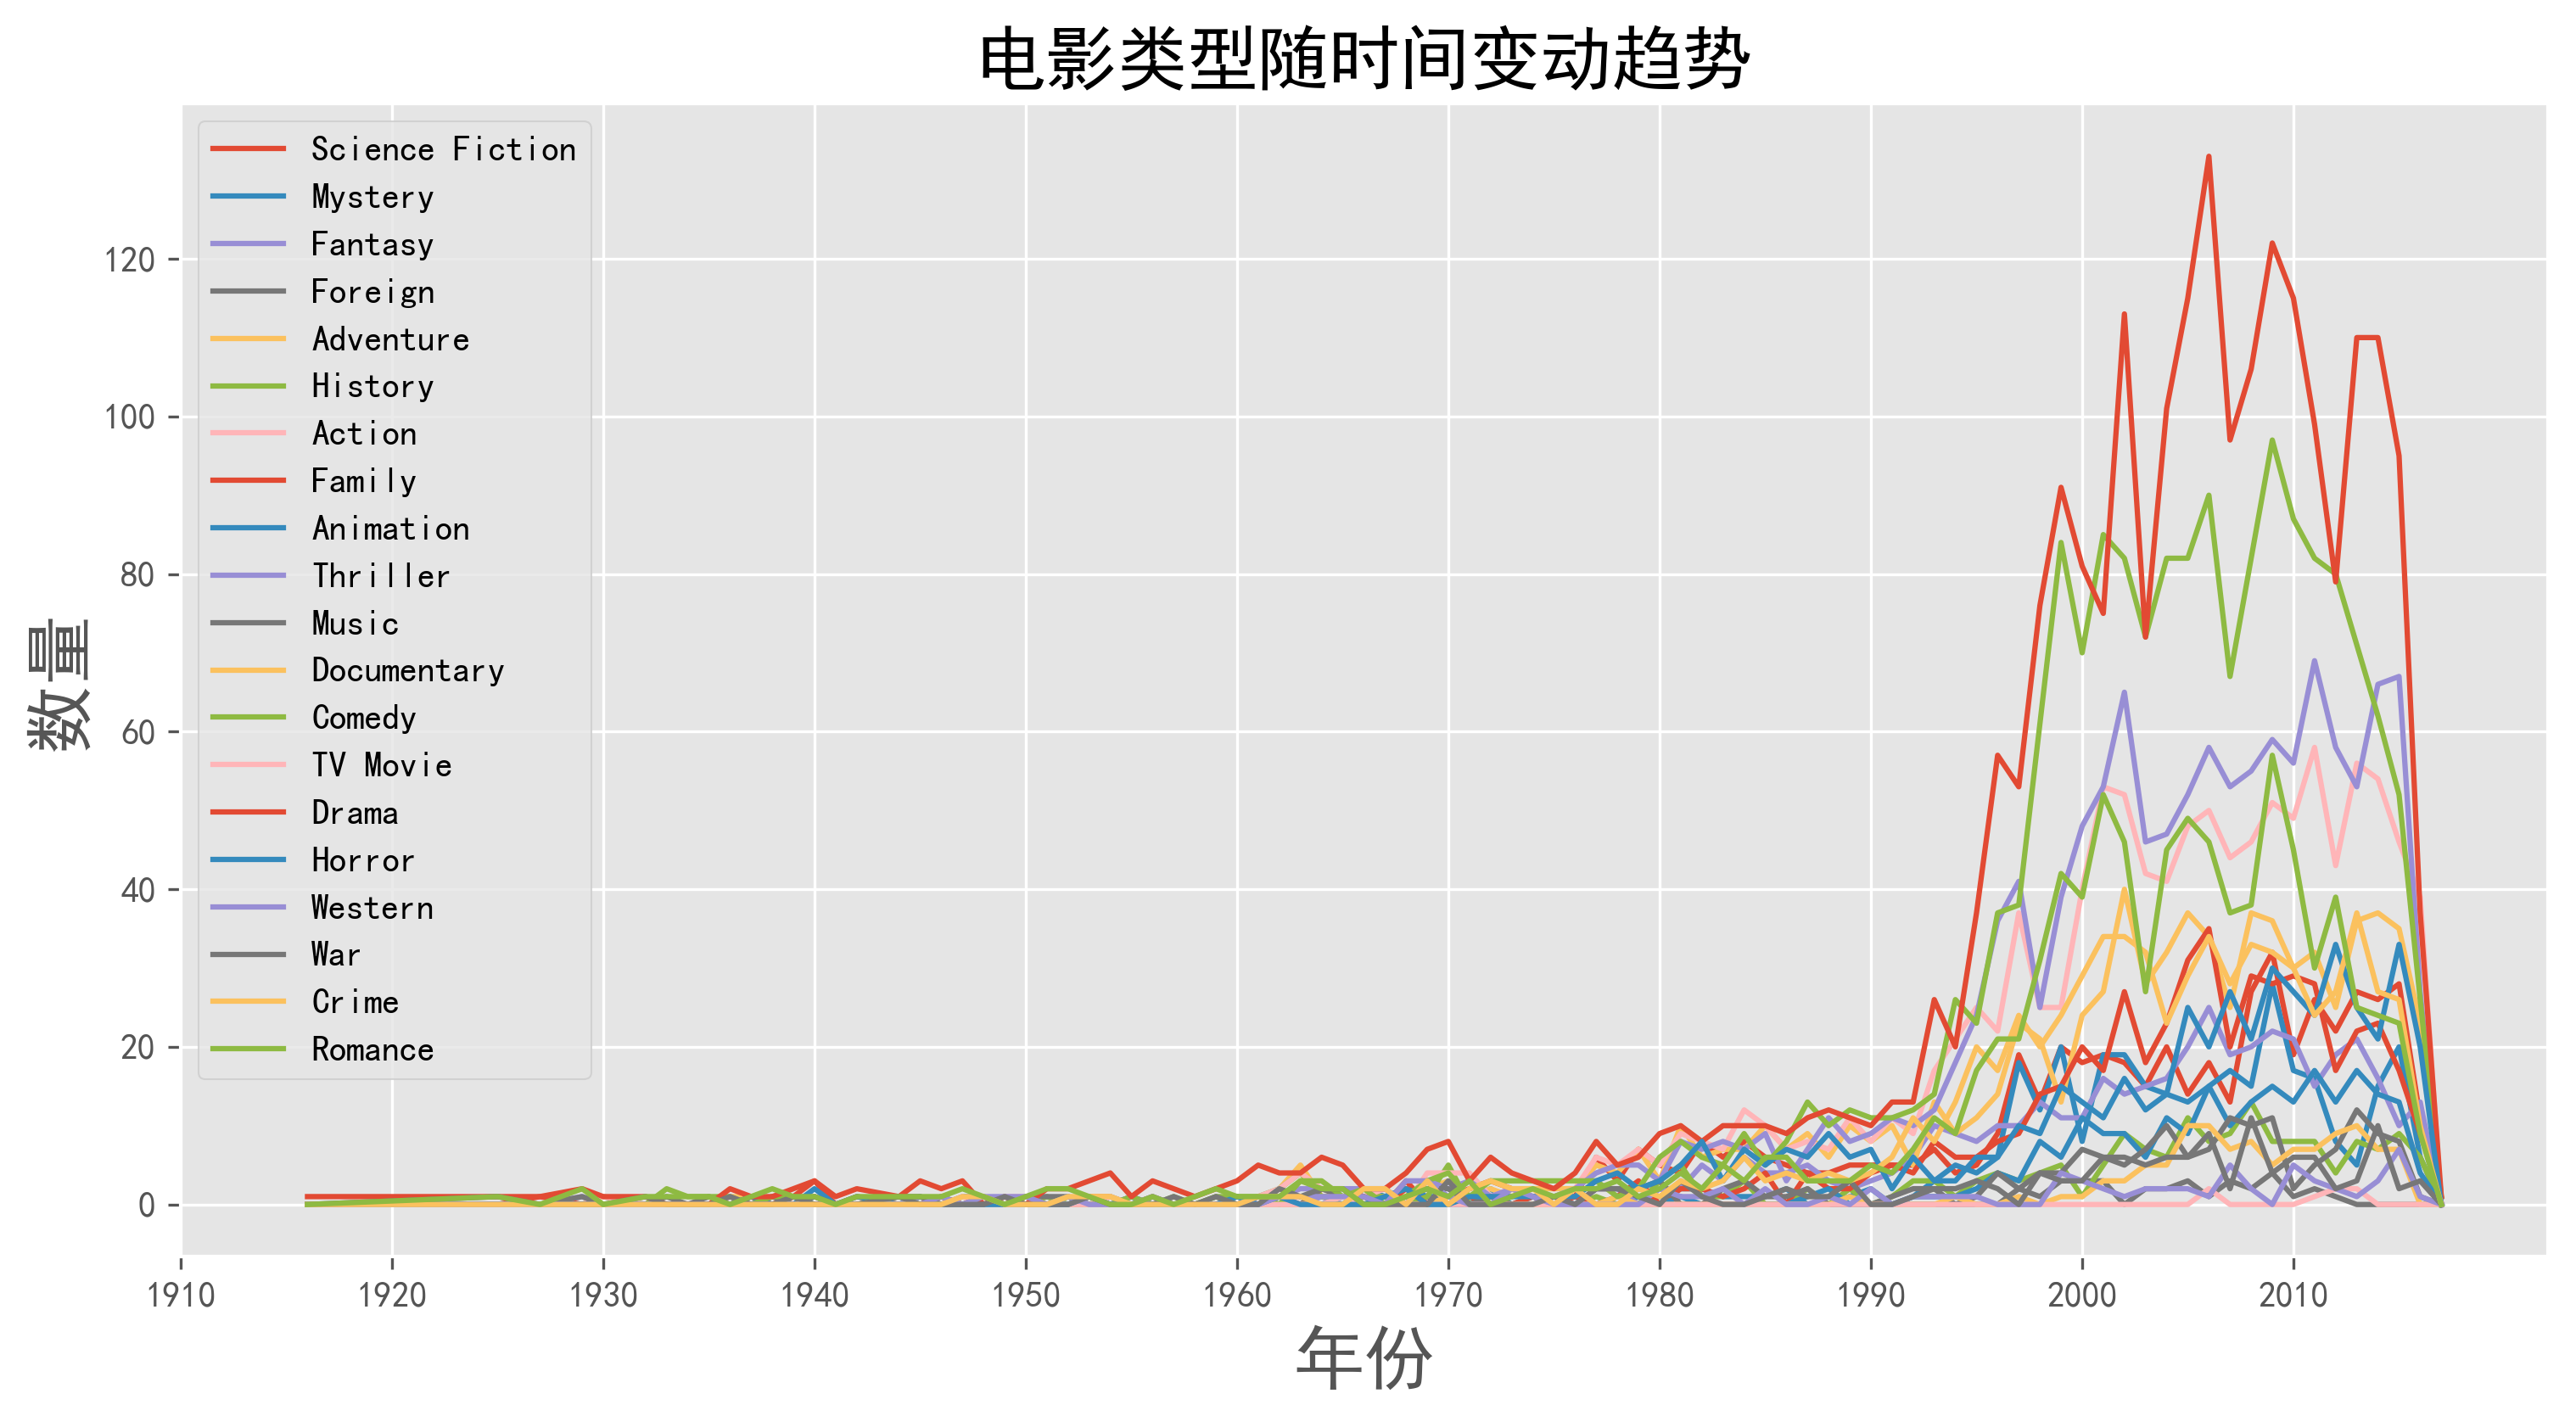

In [24]:
plt.rcParams['font.sans-serif']=['SimHei']
fig=plt.figure(figsize=(12,6),dpi=300)
plt.style.use('ggplot')
plt.plot(genre_by_year,label=genre_by_year.columns)
plt.legend(genre_by_year)
plt.xticks(range(1910,2018,10))
plt.title("电影类型随时间变动趋势",fontsize=20)
plt.xlabel('年份',fontsize=20)
plt.ylabel('数量',fontsize=20)
plt.grid(True)
plt.savefig("picture/电影类型随时间变动趋势.png",transparent = True)

In [25]:
import matplotlib  
matplotlib.matplotlib_fname() 

'/root/anaconda/yes/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [26]:
genre_sum=genre_by_year.sum().sort_values(ascending=False)
genre_sum

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
dtype: int64

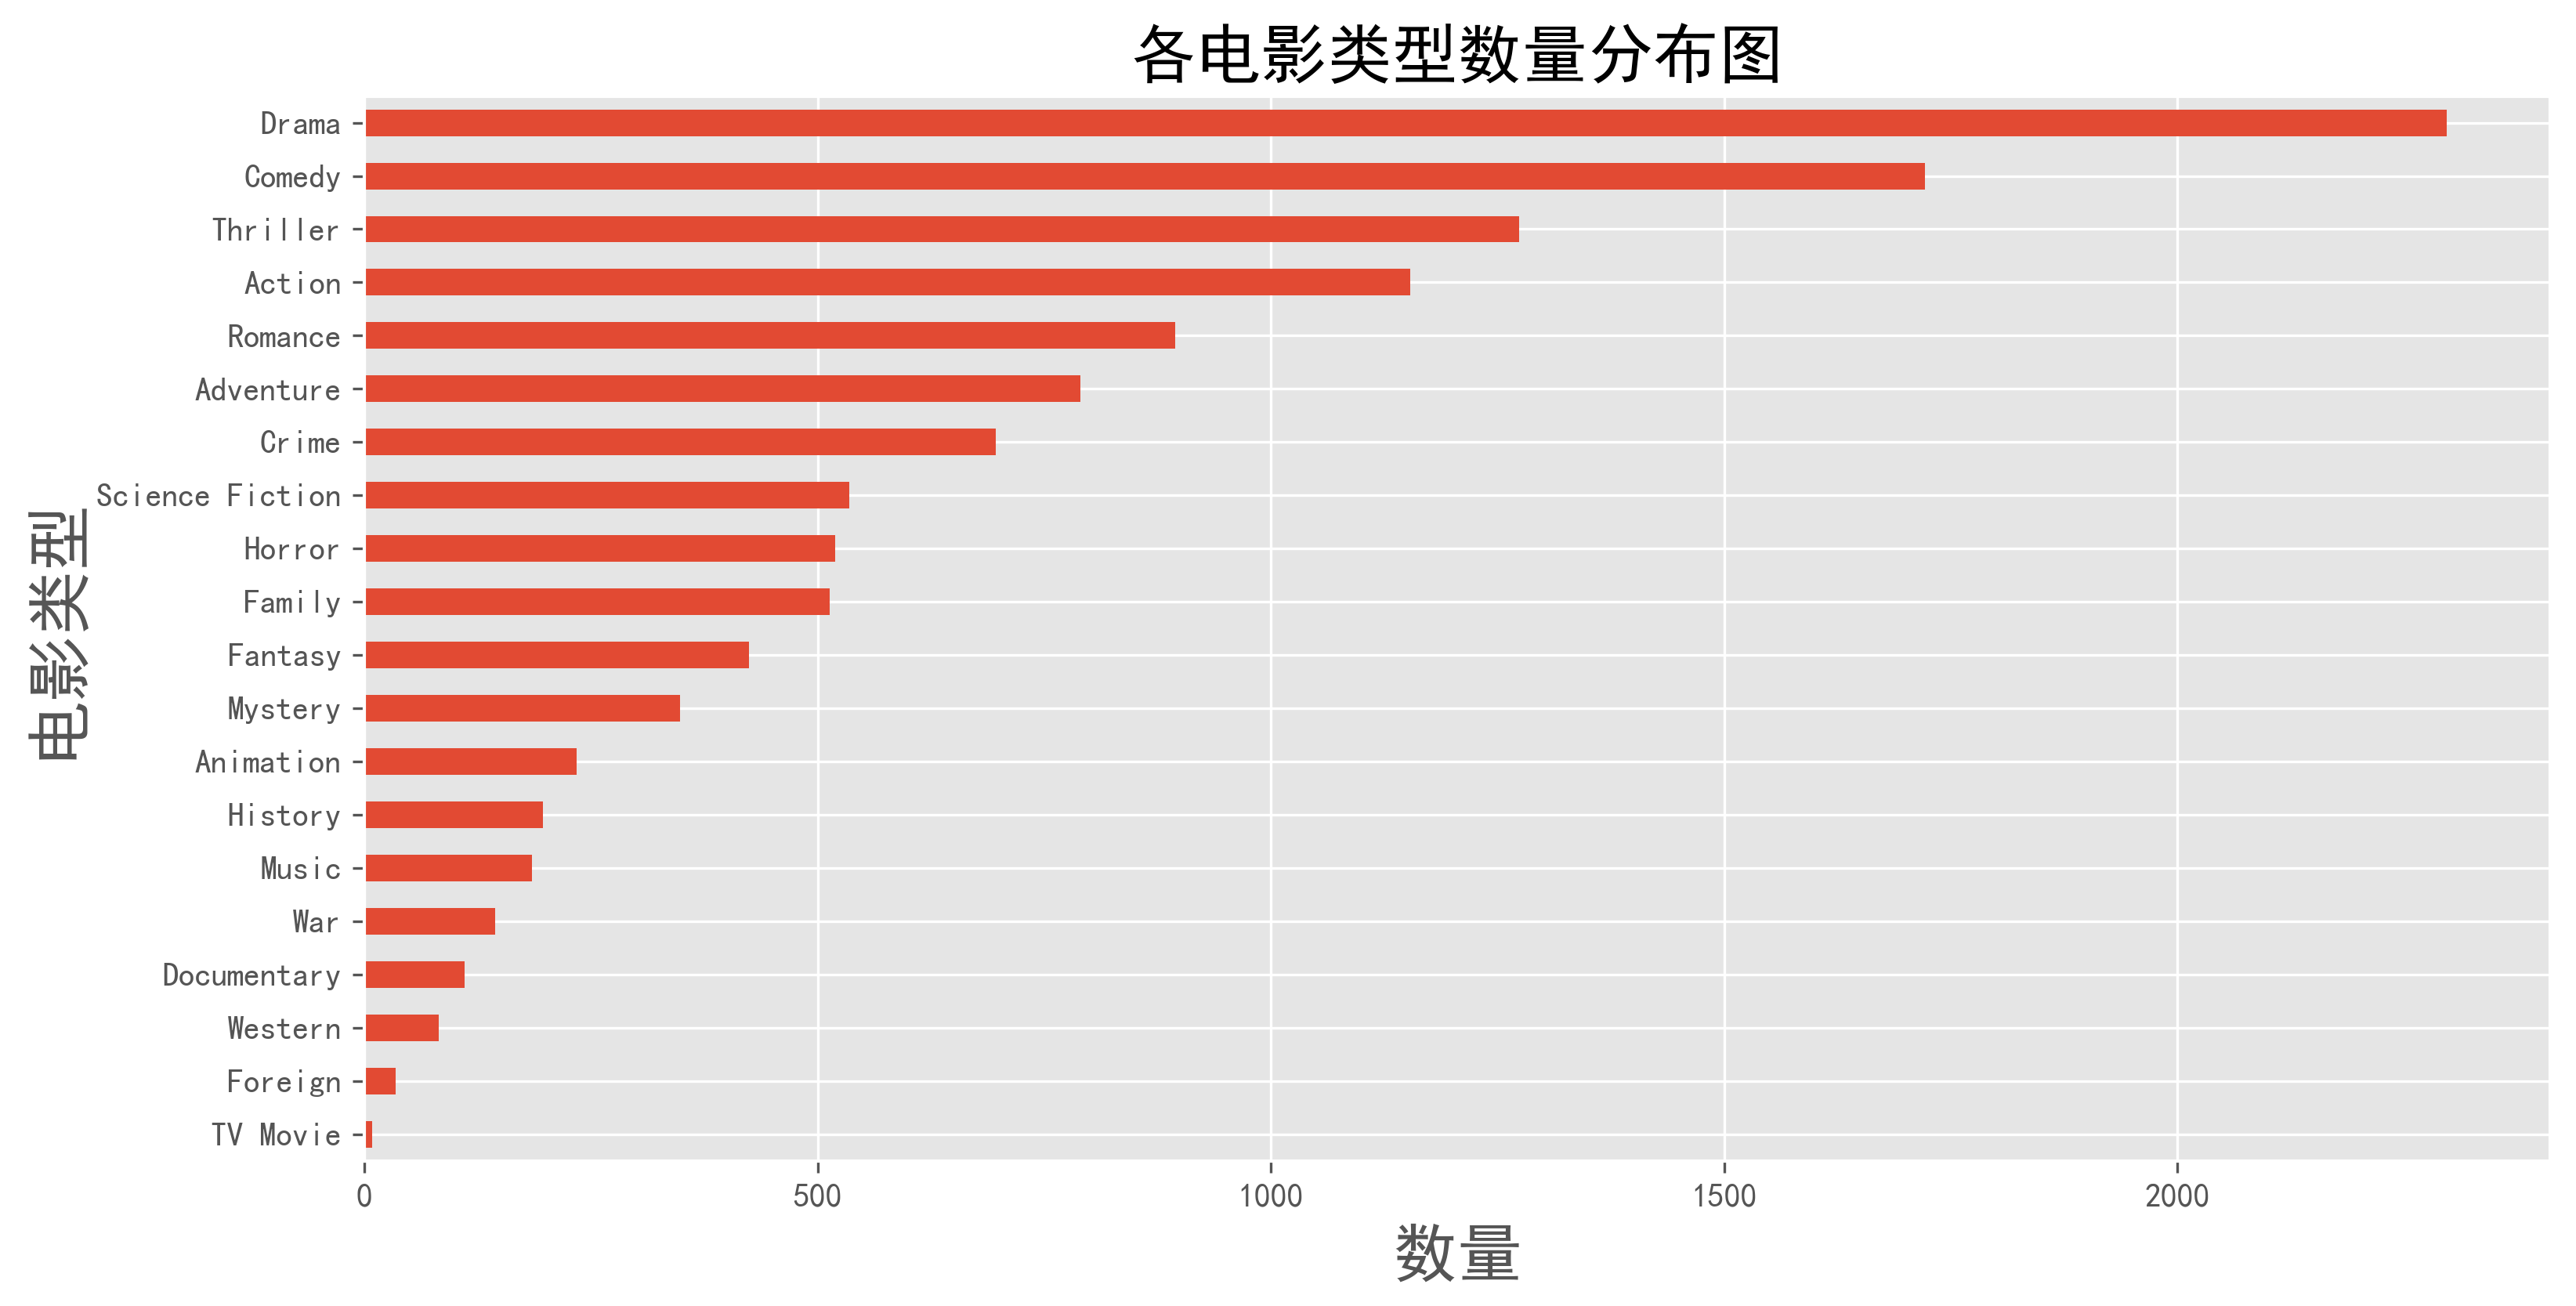

In [52]:
#各电影类型数量分布图：
genre_sum.sort_values(ascending=True).plot.barh(label='genre',figsize=(12,6))
plt.rcParams['figure.dpi'] = 500 #图片像素
plt.rcParams['figure.dpi'] = 500 #分辨率
plt.title("各电影类型数量分布图",fontsize=20)
plt.xlabel("数量",fontsize=20)
plt.ylabel("电影类型",fontsize=20)
plt.savefig("picture/各电影类型数量分布图.png",transparent = True)

In [29]:
#各类型电影的盈利情况
profit_df=pd.DataFrame()
#利润=收入-支出成本
total['profit']=total.revenue-total.budget
profit_df=pd.concat([genre_df.iloc[:,:-1],total.profit],axis=1)
profit_by_genre=pd.Series(index=genre_set)
for genre in genre_set:
    profit_by_genre[genre]=profit_df.groupby(genre,as_index=False).profit.mean().loc[1,'profit']
profit_by_genre

Science Fiction    1.120944e+08
Mystery            6.221033e+07
Fantasy            1.408738e+08
Foreign            4.523971e+07
Adventure          1.516976e+08
History            4.267519e+07
Action             1.014584e+08
Family             1.268005e+08
Animation          1.711162e+08
Thriller           6.483279e+07
Music              5.346973e+07
Documentary        4.004004e+07
Comedy             6.522191e+07
TV Movie           6.295749e+07
Drama              5.188165e+07
Horror             5.044035e+07
Western            3.456669e+07
War                5.902059e+07
Crime              5.287829e+07
Romance            5.942251e+07
dtype: float64

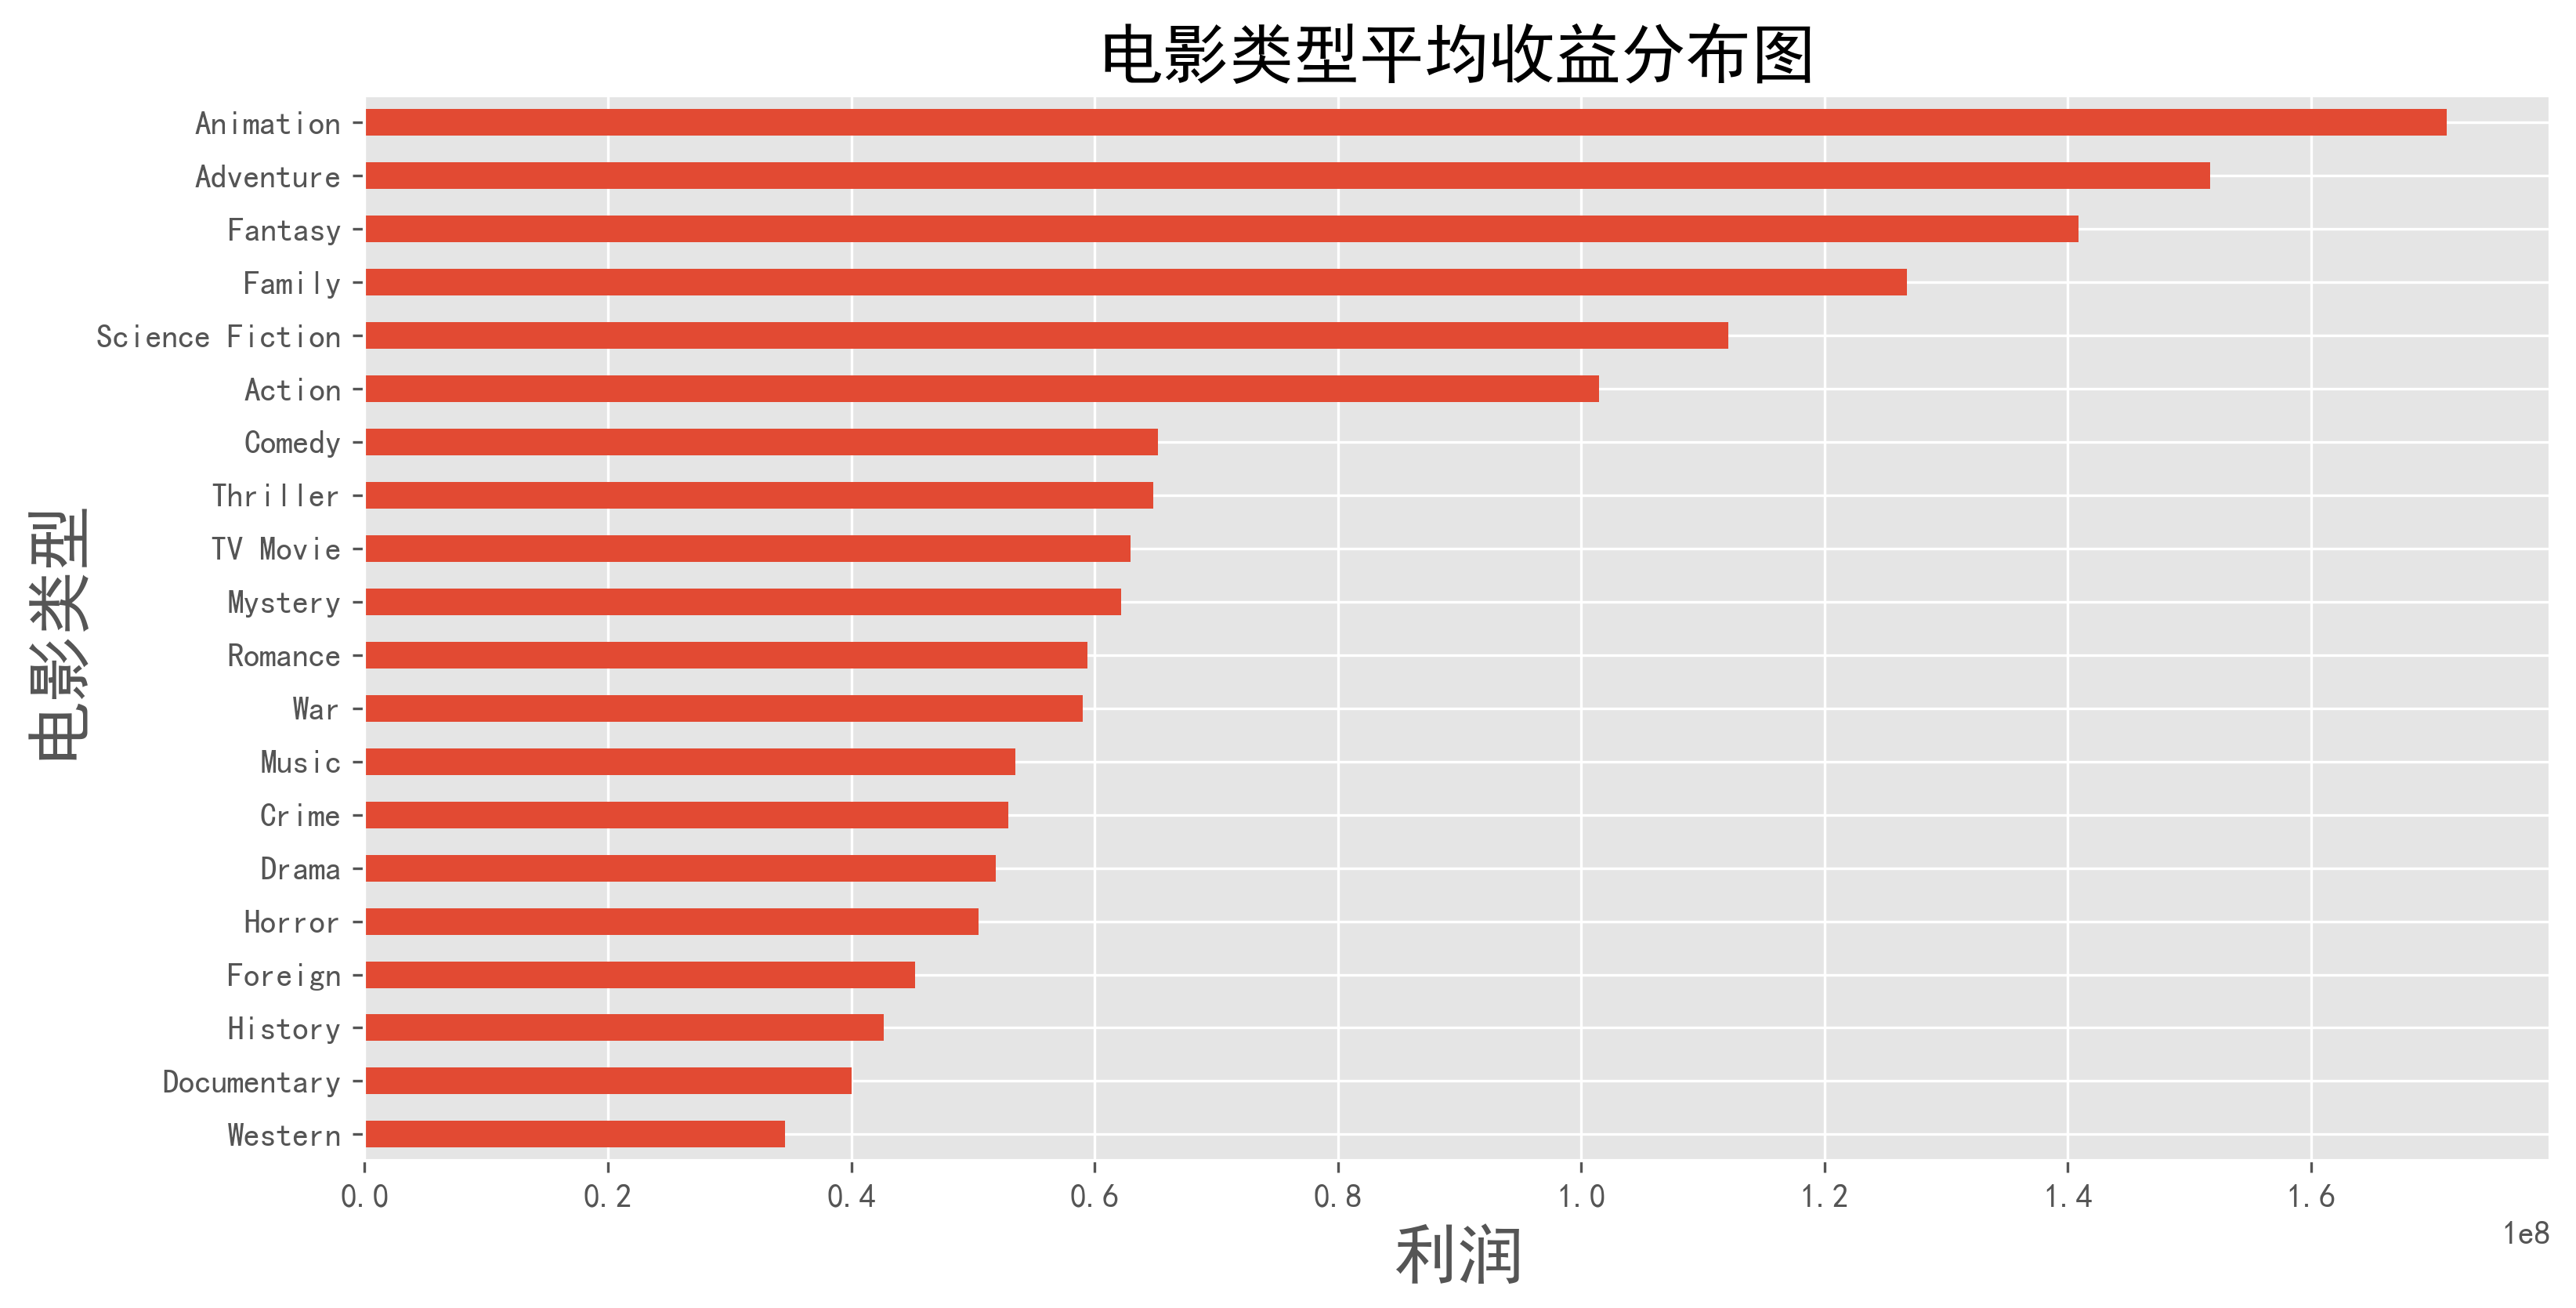

In [30]:
profit_by_genre.sort_values().plot.barh(label='genre',figsize=(12,6))
plt.title('电影类型平均收益分布图',fontsize=20)
plt.xlabel('利润',fontsize=20)
plt.ylabel('电影类型',fontsize=20)
plt.savefig("picture/电影类型平均收益分布图.png",transparent = True)

In [31]:
#原创电影与改编电影的差异
original_recompose=pd.DataFrame()
original_recompose['type']=total.keywords.str.contains('based on novel').map(lambda x:1 if x else 0)
count_list=original_recompose.groupby('type').type.count()
original_recompose['profit']=total.profit
original_recompose['budget']=total.budget

In [32]:
original_recompose=original_recompose.groupby('type').mean()
original_recompose['count']=count_list
original_recompose['profit_rate']=original_recompose.profit/original_recompose.budget
original_recompose.rename(index={0:'orginal',1:'recompose'},inplace=True)
original_recompose

profit        budget  count  profit_rate
type                                                     
orginal    6.999245e+07  3.479967e+07   4606     2.011296
recompose  1.039367e+08  4.738957e+07    197     2.193239

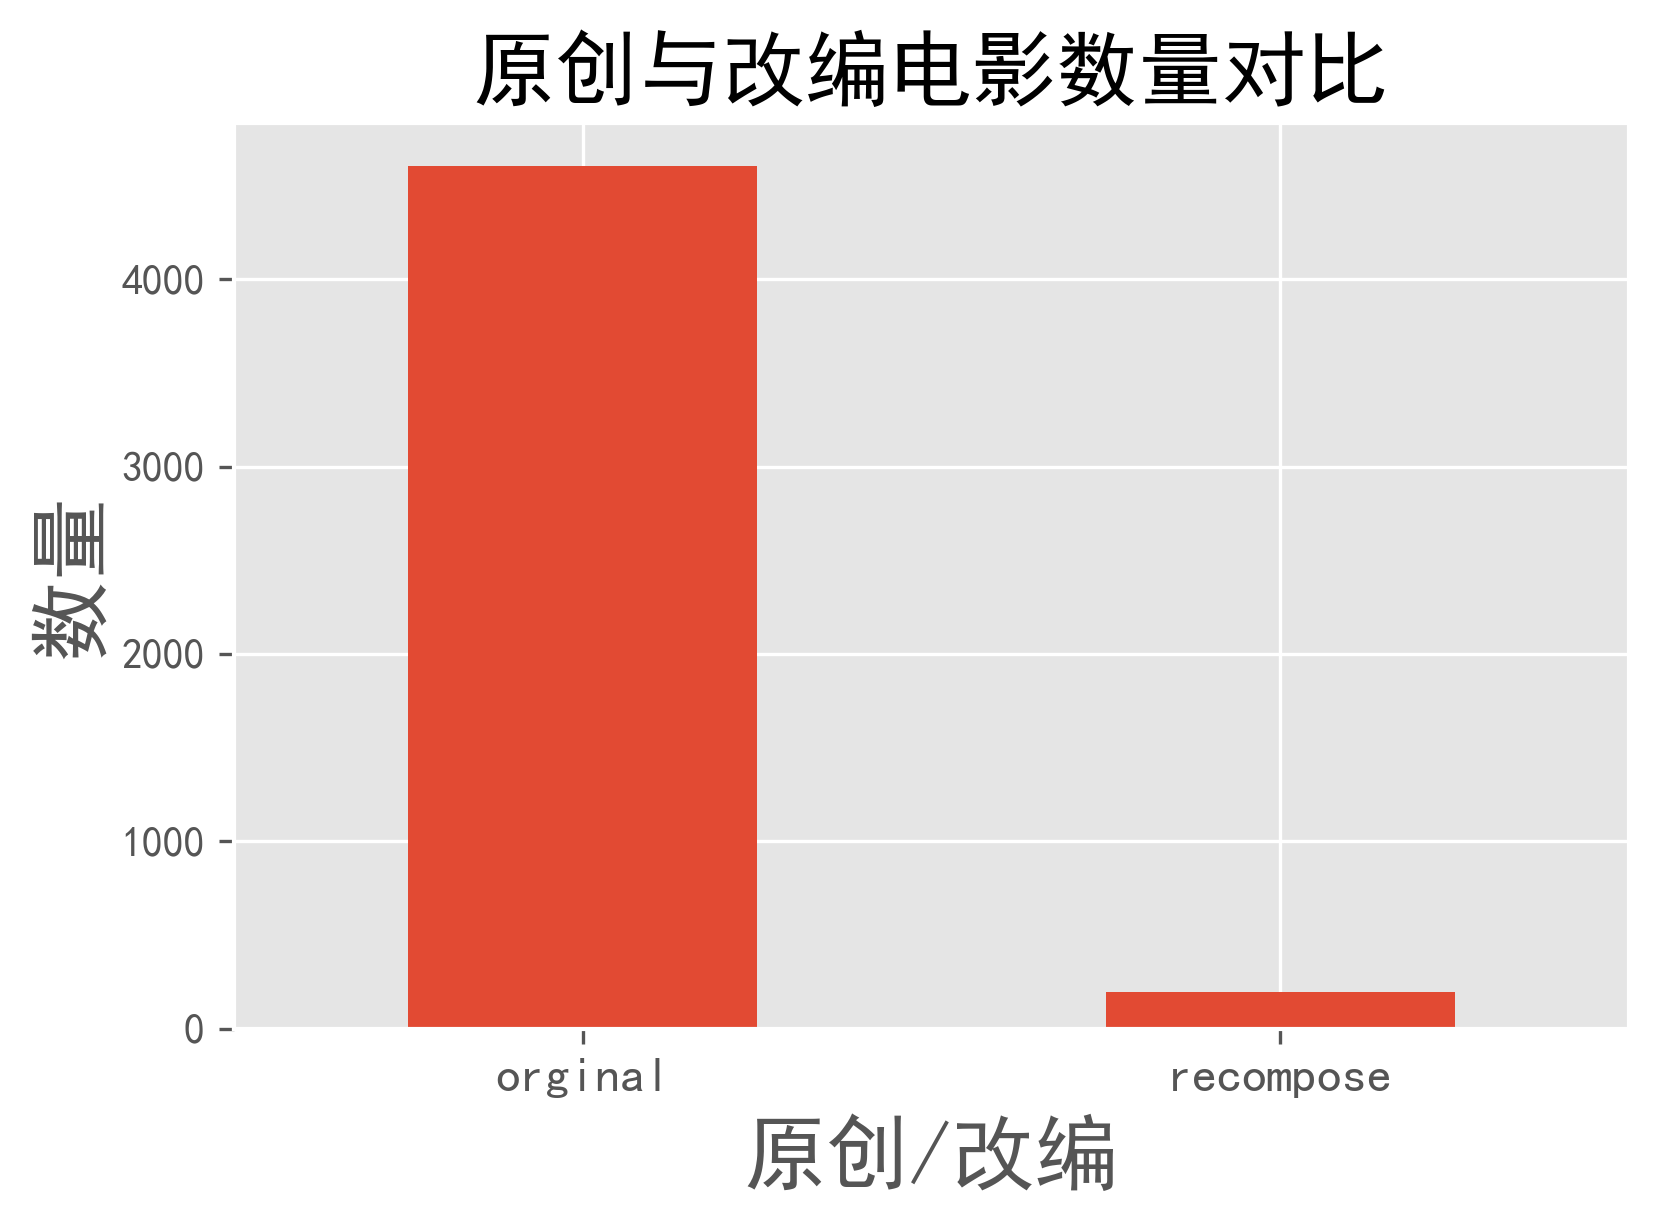

In [33]:
#数量对比：
plt.figure()
original_recompose.loc[original_recompose.index,'count'].plot.bar()
plt.title('原创与改编电影数量对比',fontsize=20)
plt.xticks(fontsize=12,rotation=0)
plt.xlabel('原创/改编',fontsize=20)
plt.ylabel('数量',fontsize=20)
plt.savefig('picture/原创与改编电影数量对比.png',transparent = True)

/root/anaconda/yes/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


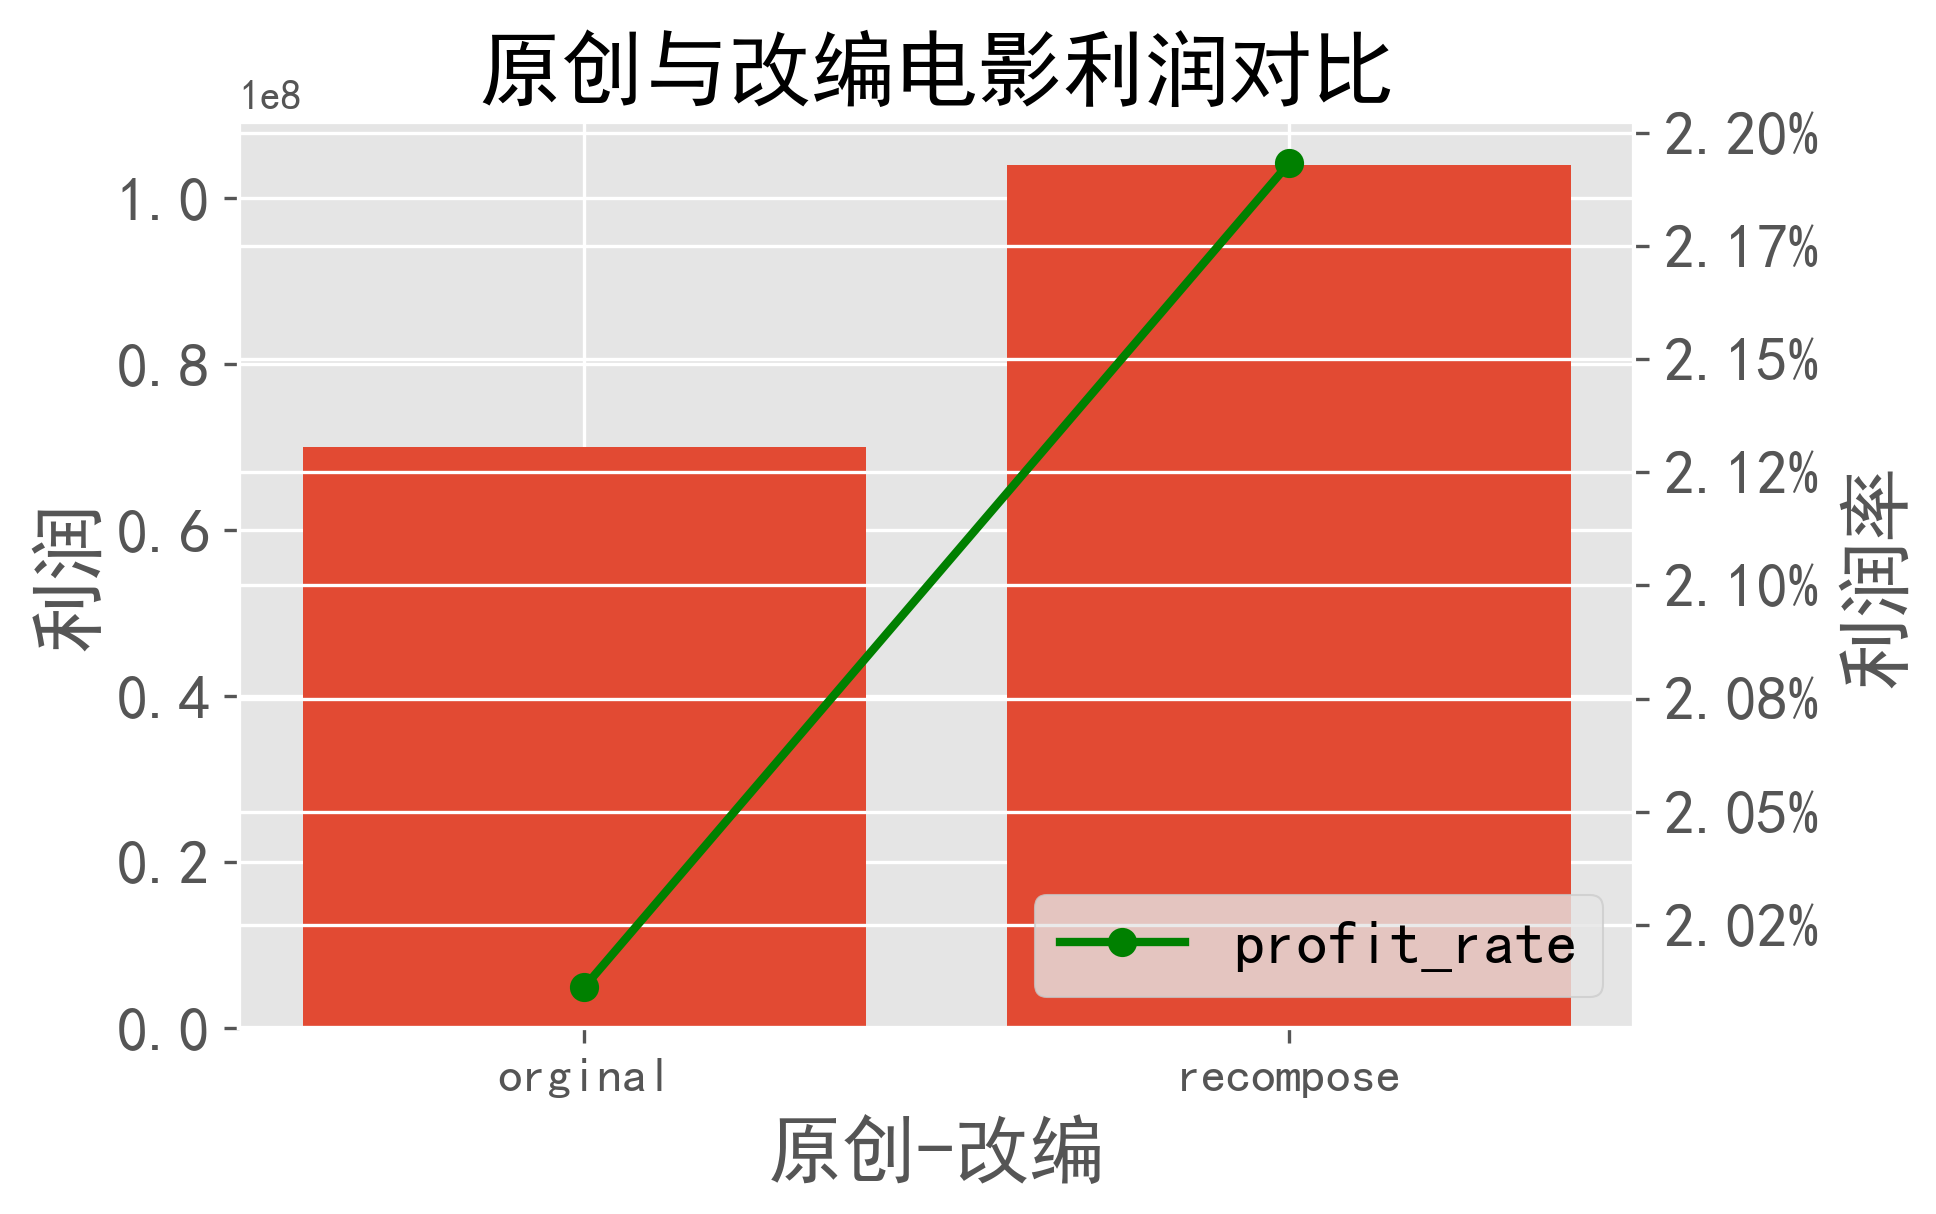

In [35]:
#绘制利润柱状图
x = list(range(len(original_recompose.index)))#x为索引/长度序列
xl = original_recompose.index#xL为索引实际值
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.bar(x, original_recompose[ 'profit' ])
plt.xticks(x,xl, rotation=0,fontsize=12)
plt.yticks(fontsize=15)
ax1.set_title( '原创与改编电影利润对比',fontsize=20)
ax1.set_xlabel( '原创-改编',fontsize=18)
ax1.set_ylabel( '利润', fontsize=18)
ax1.legend(loc=2, fontsize=15)
#绘制利润率折线图
import matplotlib.ticker as mtick
ax2 = ax1.twinx()
ax2.plot(x,original_recompose['profit_rate'],'go-' ,lw=2)
fmt='%.2f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)#次纵坐标轴标签设置为百分比显示
plt.yticks(fontsize=15)
ax2.set_ylabel( '利润率',fontsize=18)
ax2.legend(loc=4, fontsize=15)
plt.savefig('picture/原创与改编电影利润对比.png',transparent = True)

In [36]:
#（四）电影产地分布
country_set=set( )#创建一个存放国家的集合
for x in total['production_countries']:
    country_set.update(x.split("|"))
country_set.discard("")
country_df=pd.DataFrame()#存储电影产地的数据
for country in country_set:
    country_df[country]=total['production_countries'].str.contains(country).map(lambda x :1 if x else 0)
country_df=country_df.sum().sort_values(ascending=False)#计算各国家电影数量
country_df


United States of America    3956
United Kingdom               636
Germany                      324
France                       306
Canada                       261
Australia                    110
Italy                         72
Spain                         71
China                         59
Japan                         58
India                         54
Hong Kong                     48
Ireland                       37
Mexico                        30
New Zealand                   28
Belgium                       25
Czech Republic                24
South Africa                  20
Denmark                       20
Sweden                        19
Russia                        19
Switzerland                   19
South Korea                   18
Netherlands                   18
Norway                        14
United Arab Emirates          14
Brazil                        13
Hungary                       13
Romania                       12
Luxembourg                    11
          

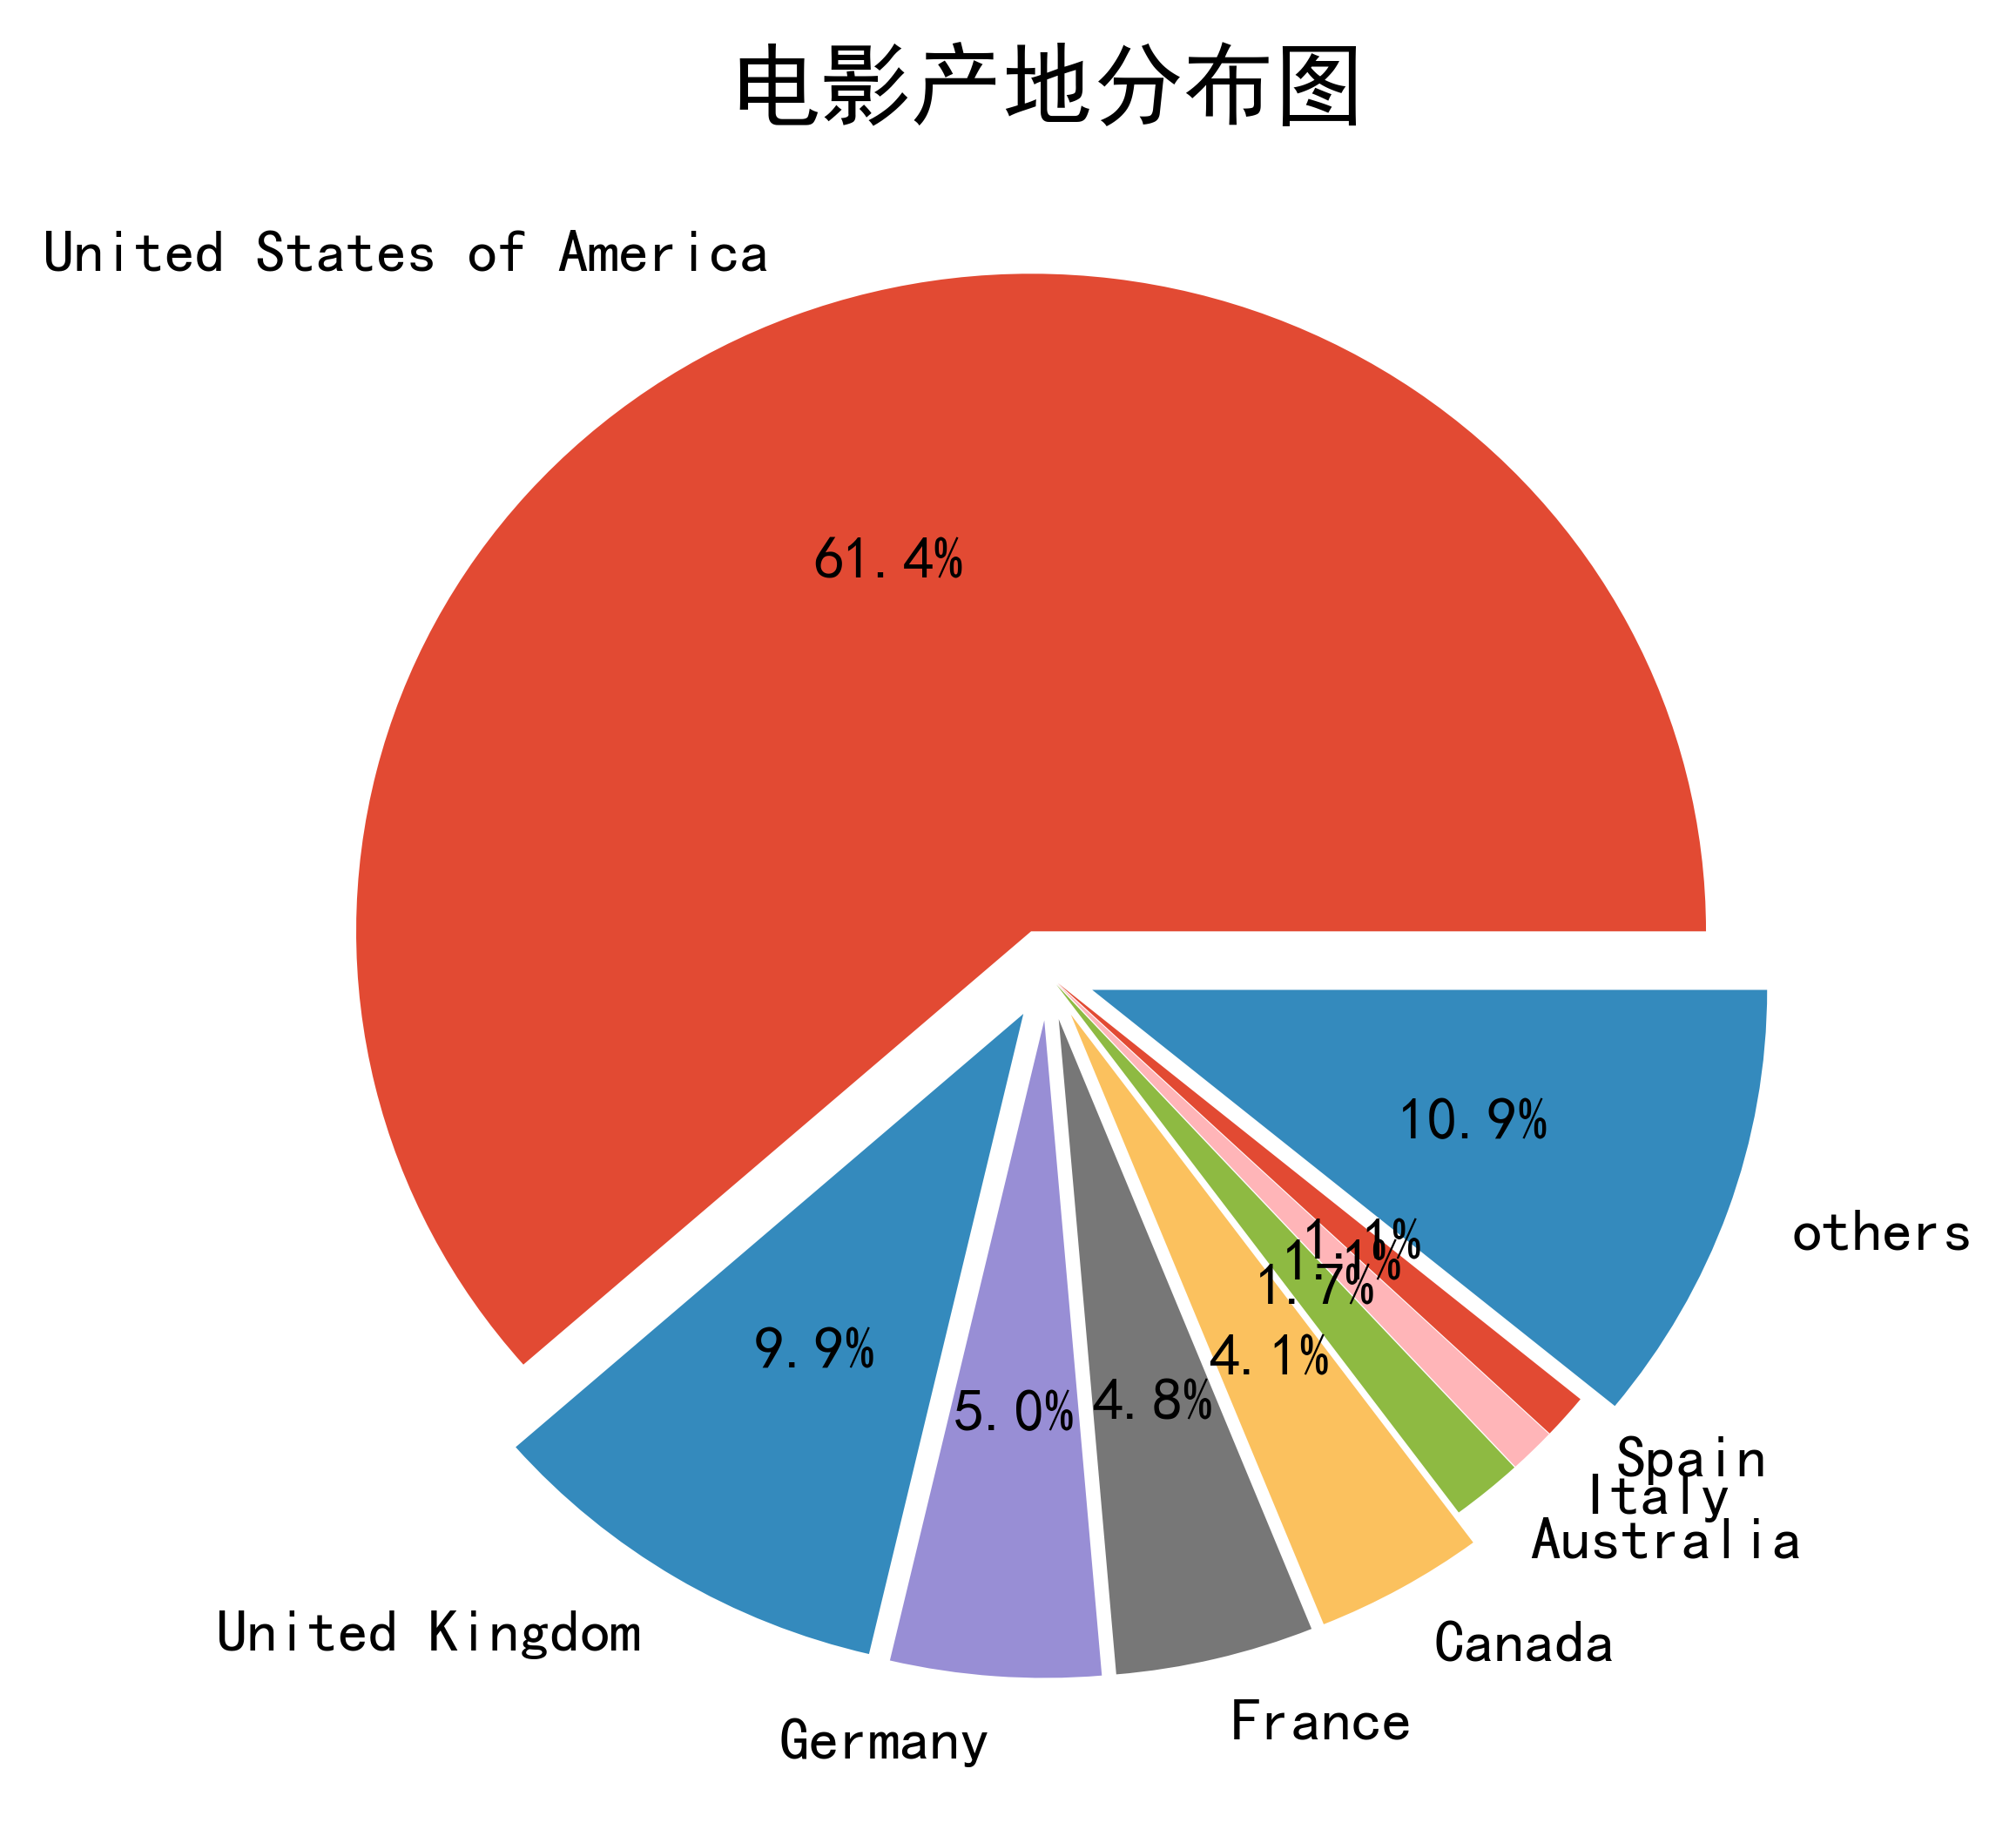

In [58]:
rate=country_df/country_df.sum()
others=0.01
rate1=rate[rate>=others]
rate1['others']=rate[rate<others].sum()#占比小于1%的放入others
explode=(rate1>=0.04)/20+0.02 #占比大于4%的向外延伸
plt.rcParams['figure.dpi'] = 500 #图片像素
plt.rcParams['figure.dpi'] = 500 #分辨率
rate1.plot.pie(autopct='%1.1f%%',figsize=(5,5),explode=explode,label='')
plt.title('电影产地分布图',fontsize=15)
plt.savefig('picture/电影产地分布图.png',transparent = True)

In [38]:
#（五）电影关键字
keywords_list = []
list1=[]
for x in total['keywords']:
    keywords_list.append(x)
    keywords_list
keywords_list=''.join(keywords_list)
#去掉没有实际含义的字符
keywords_list=keywords_list.replace('\'s','')
keywords_list=keywords_list.replace("based on","")
# keywords_list

In [39]:
keywords_list

'culture clash|future|space war|space colony|society|space travel|futuristic|romance|space|alien|tribe|alien planet|cgi|marine|soldier|battle|love affair|anti war|power relations|mind and soul|3docean|drug abuse|exotic island|east india trading company|love of one life|traitor|shipwreck|strong woman|ship|alliance|calypso|afterlife|fighter|pirate|swashbuckler|aftercreditsstingerspy| novel|secret agent|sequel|mi6|british secret service|united kingdomdc comics|crime fighter|terrorist|secret identity|burglar|hostage drama|time bomb|gotham city|vigilante|cover-up|superhero|villainess|tragic hero|terrorism|destruction|catwoman|cat burglar|imax|flood|criminal underworld|batman novel|mars|medallion|space travel|princess|alien|steampunk|martian|escape|edgar rice burroughs|alien race|superhuman strength|mars civilization|sword and planet|19th century|3ddual identity|amnesia|sandstorm|love of one life|forgiveness|spider|wretch|death of a friend|egomania|sand|narcism|hostility|marvel comic|sequel|

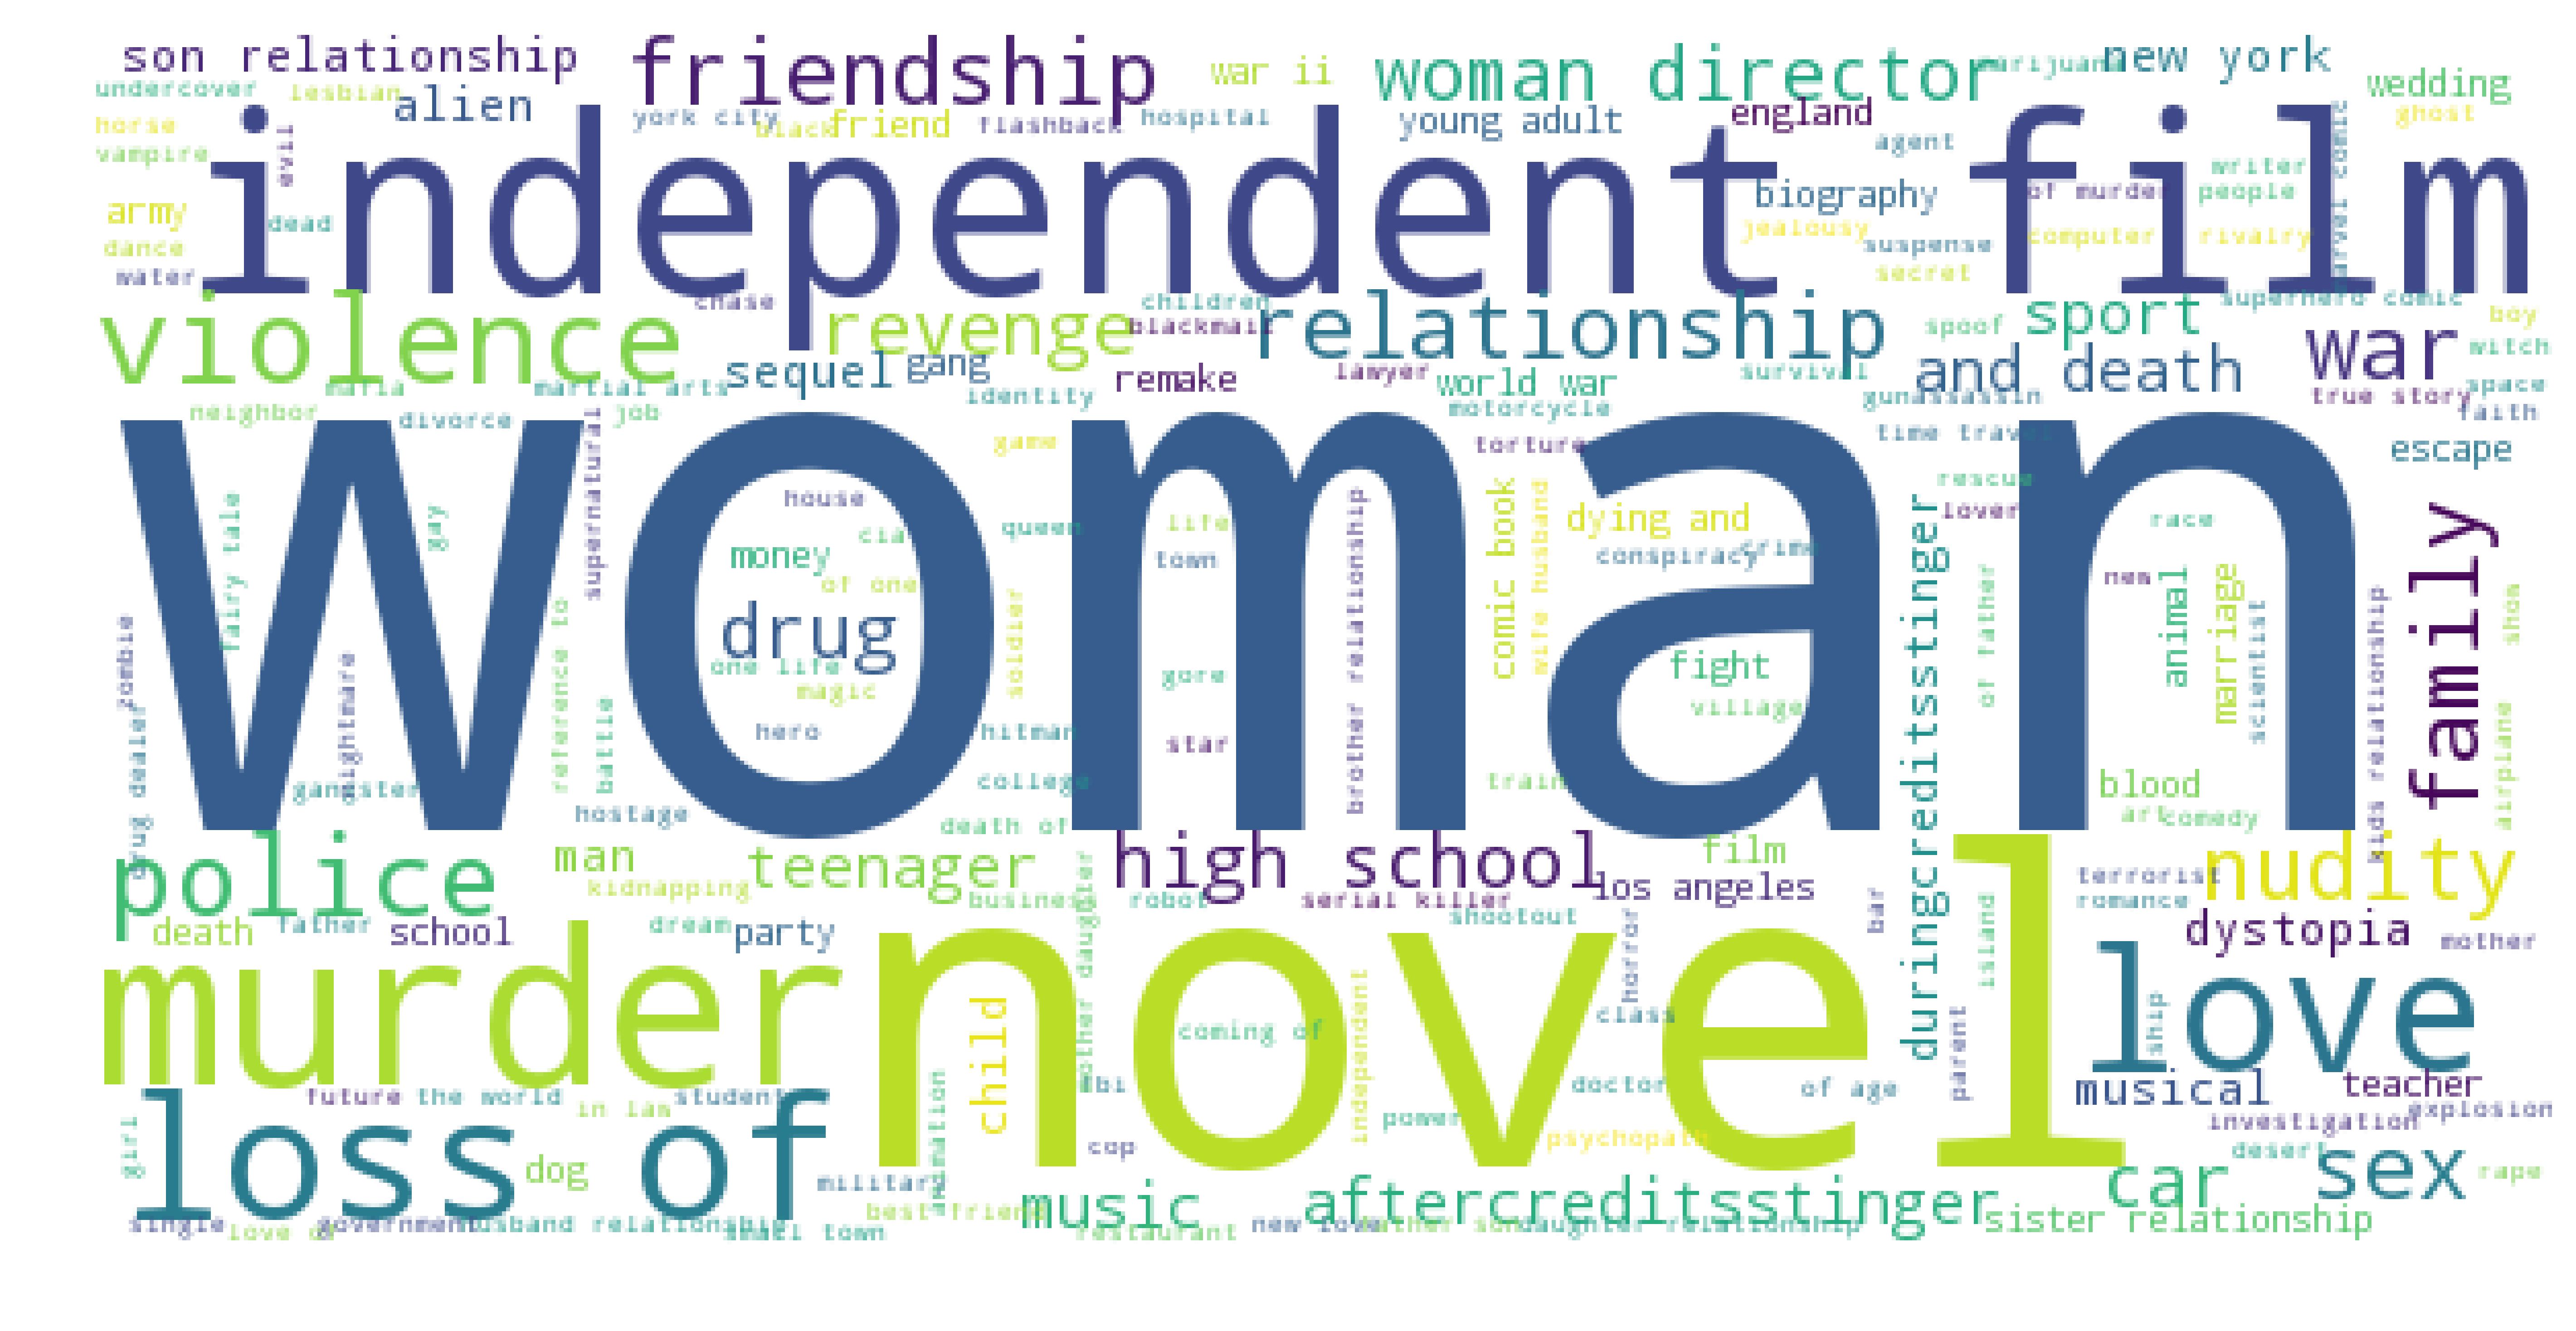

In [80]:
from wordcloud import WordCloud
wordcloud=WordCloud(background_color='white',
                    max_words=3000,
                    scale=1.5).generate(keywords_list)
plt.figure(figsize=(14,8),dpi=500)
plt.imshow(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
wordcloud.to_file("picture/词云.jpg")
# plt.savefig("picture/词云.jpg")

In [40]:
#电影类型与受欢迎度的关系
popluar_genre_df=pd.DataFrame()
popular_genre_df=pd.concat([genre_df.iloc[:,:-1],total.popularity],axis=1)
list=[]
for genre in genre_set:
    list.append(popular_genre_df.groupby(genre,as_index=False).popularity.mean().loc[1,'popularity'])
popular_by_genre=pd.DataFrame(index=genre_set)
popular_by_genre['popular_mean']=list
popular_by_genre['popular_mean'].sort_values(ascending=False)

Adventure          39.268042
Animation          38.813439
Science Fiction    36.451806
Fantasy            36.387043
Action             30.940382
Family             27.832849
Mystery            24.586827
Thriller           24.460077
War                23.777289
Crime              22.853274
Horror             18.295915
Western            18.236279
Comedy             18.221001
Drama              17.764853
History            17.444839
Romance            15.962426
Music              13.101512
TV Movie            6.389415
Documentary         3.945724
Foreign             0.686787
Name: popular_mean, dtype: float64

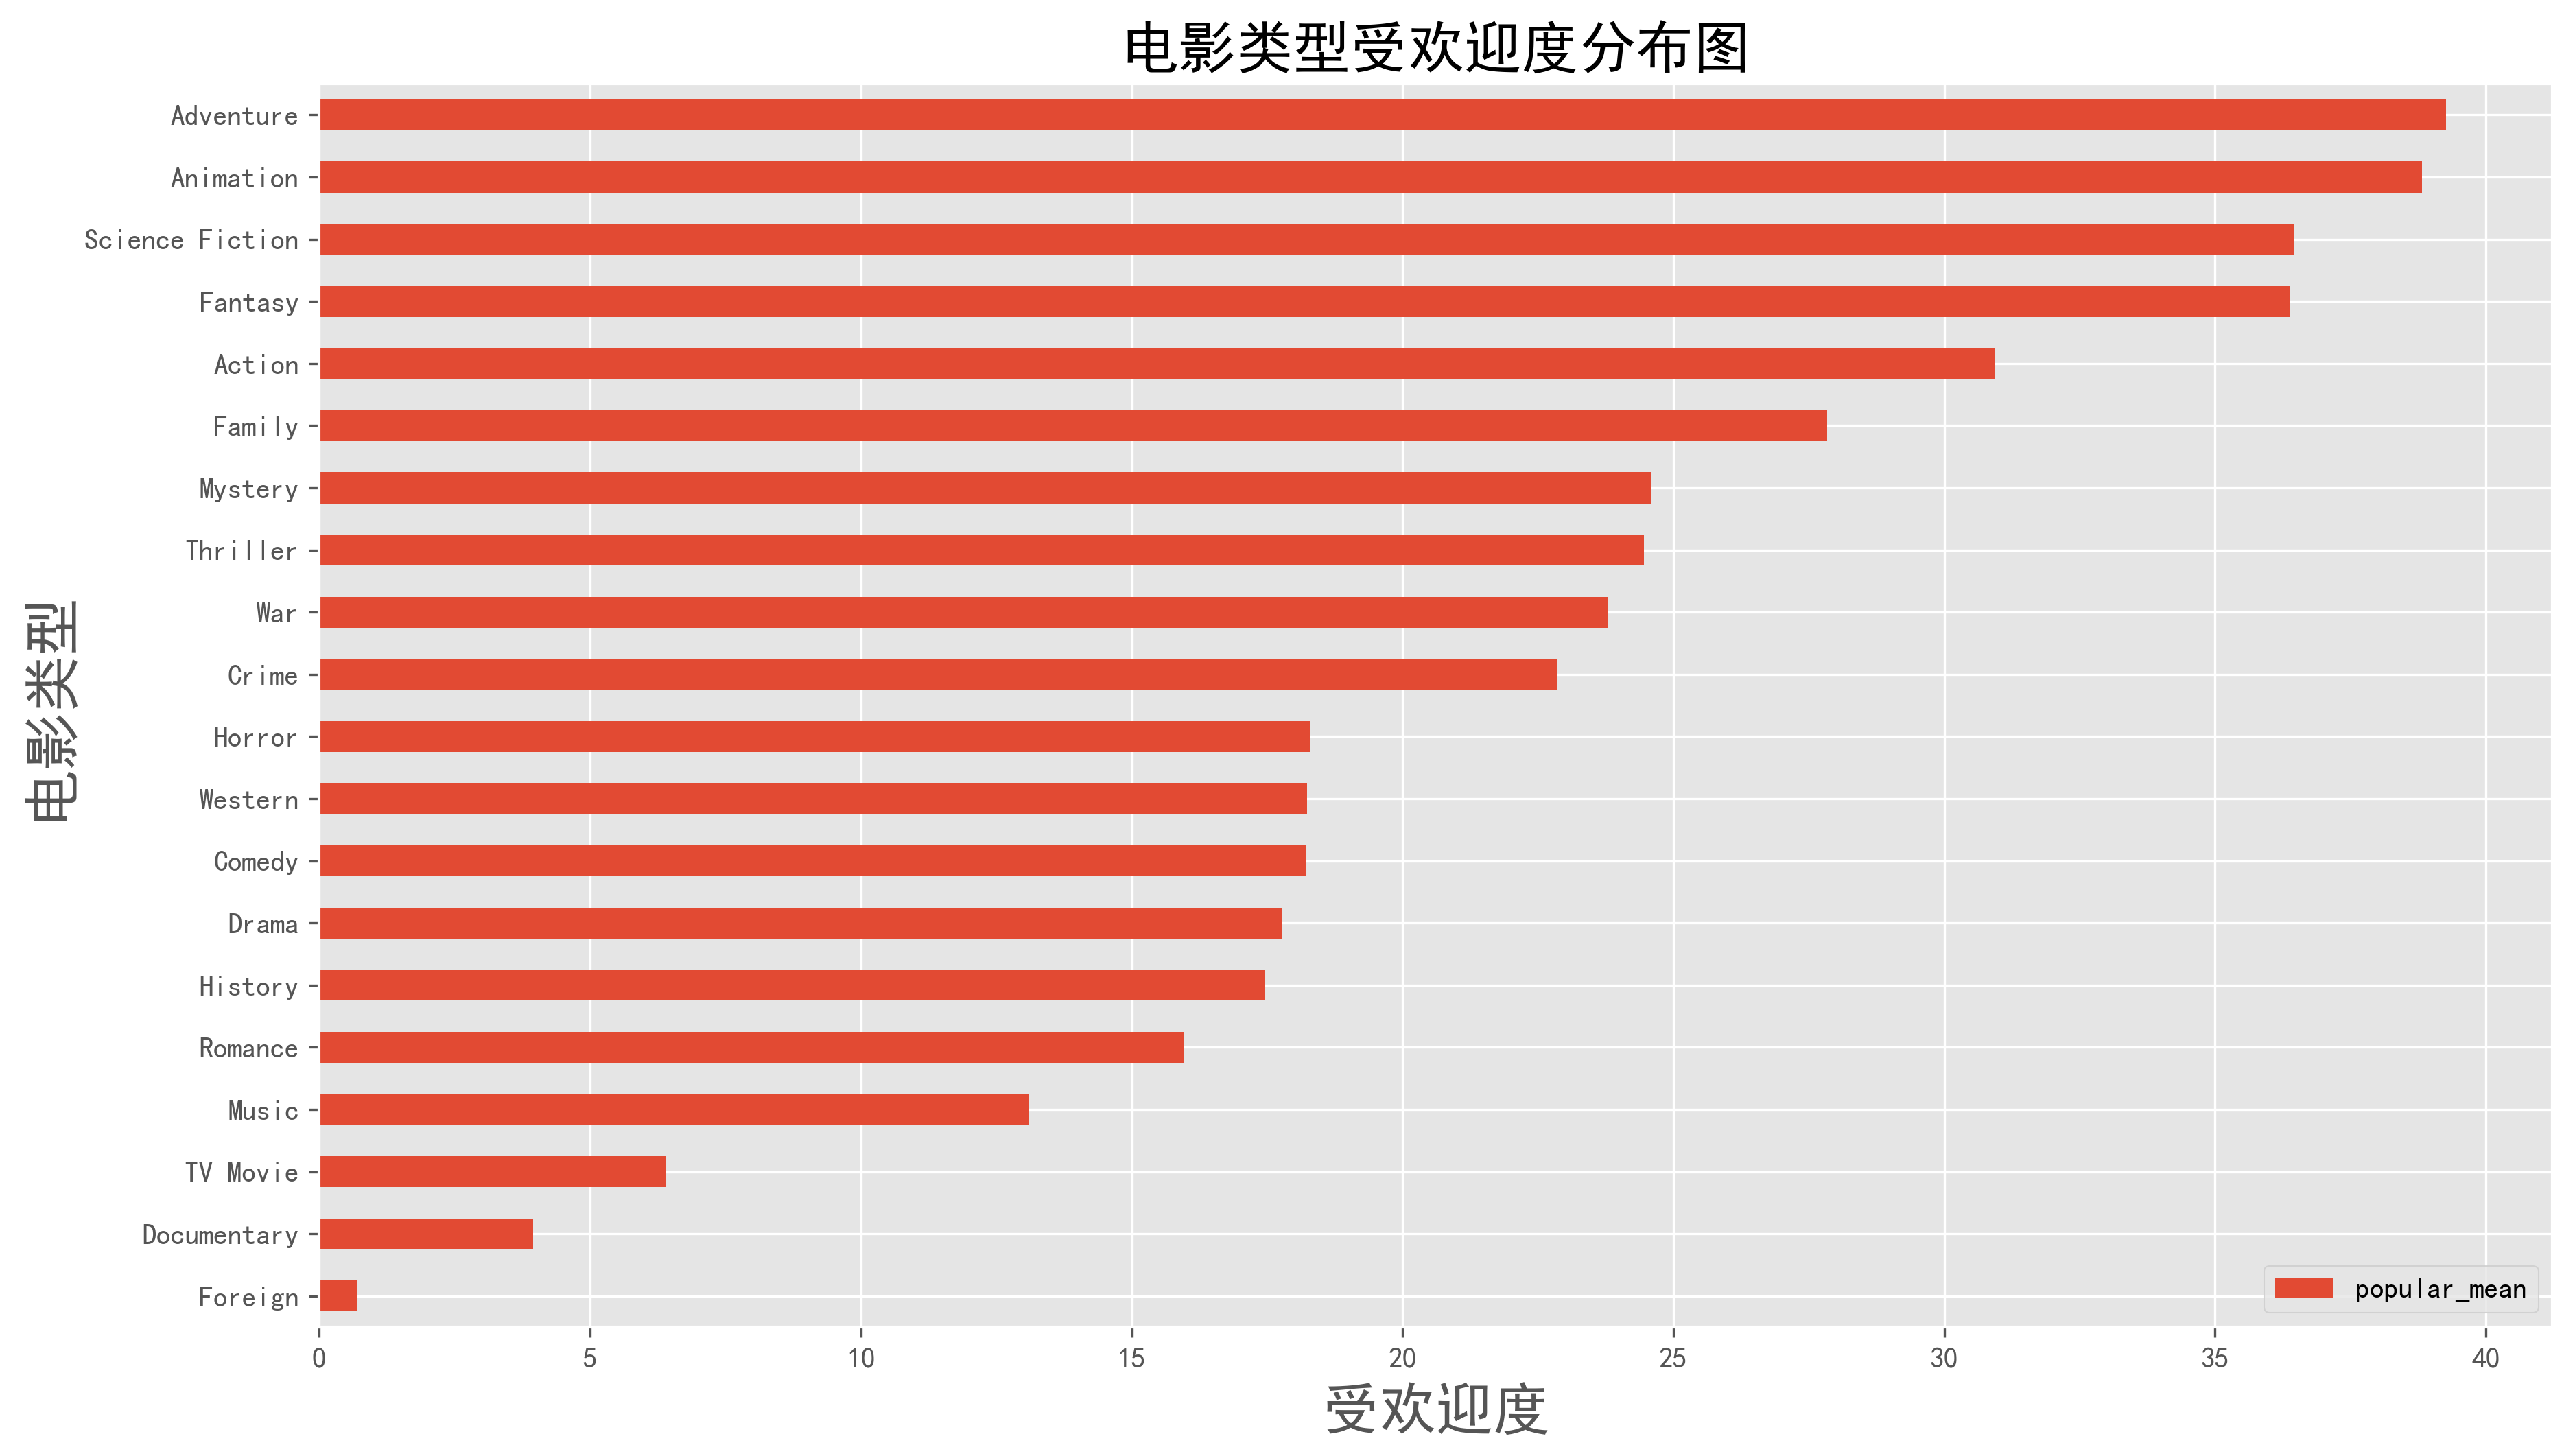

In [41]:
popular_by_genre.sort_values(by='popular_mean').plot.barh(label='genre',figsize=(14,8))
plt.rcParams['figure.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.title("电影类型受欢迎度分布图",fontsize=20)
plt.xlabel('受欢迎度',fontsize=20)
plt.ylabel('电影类型',fontsize=20)
plt.savefig("picture/电影类型受欢迎度分布图.png",transparent = True)

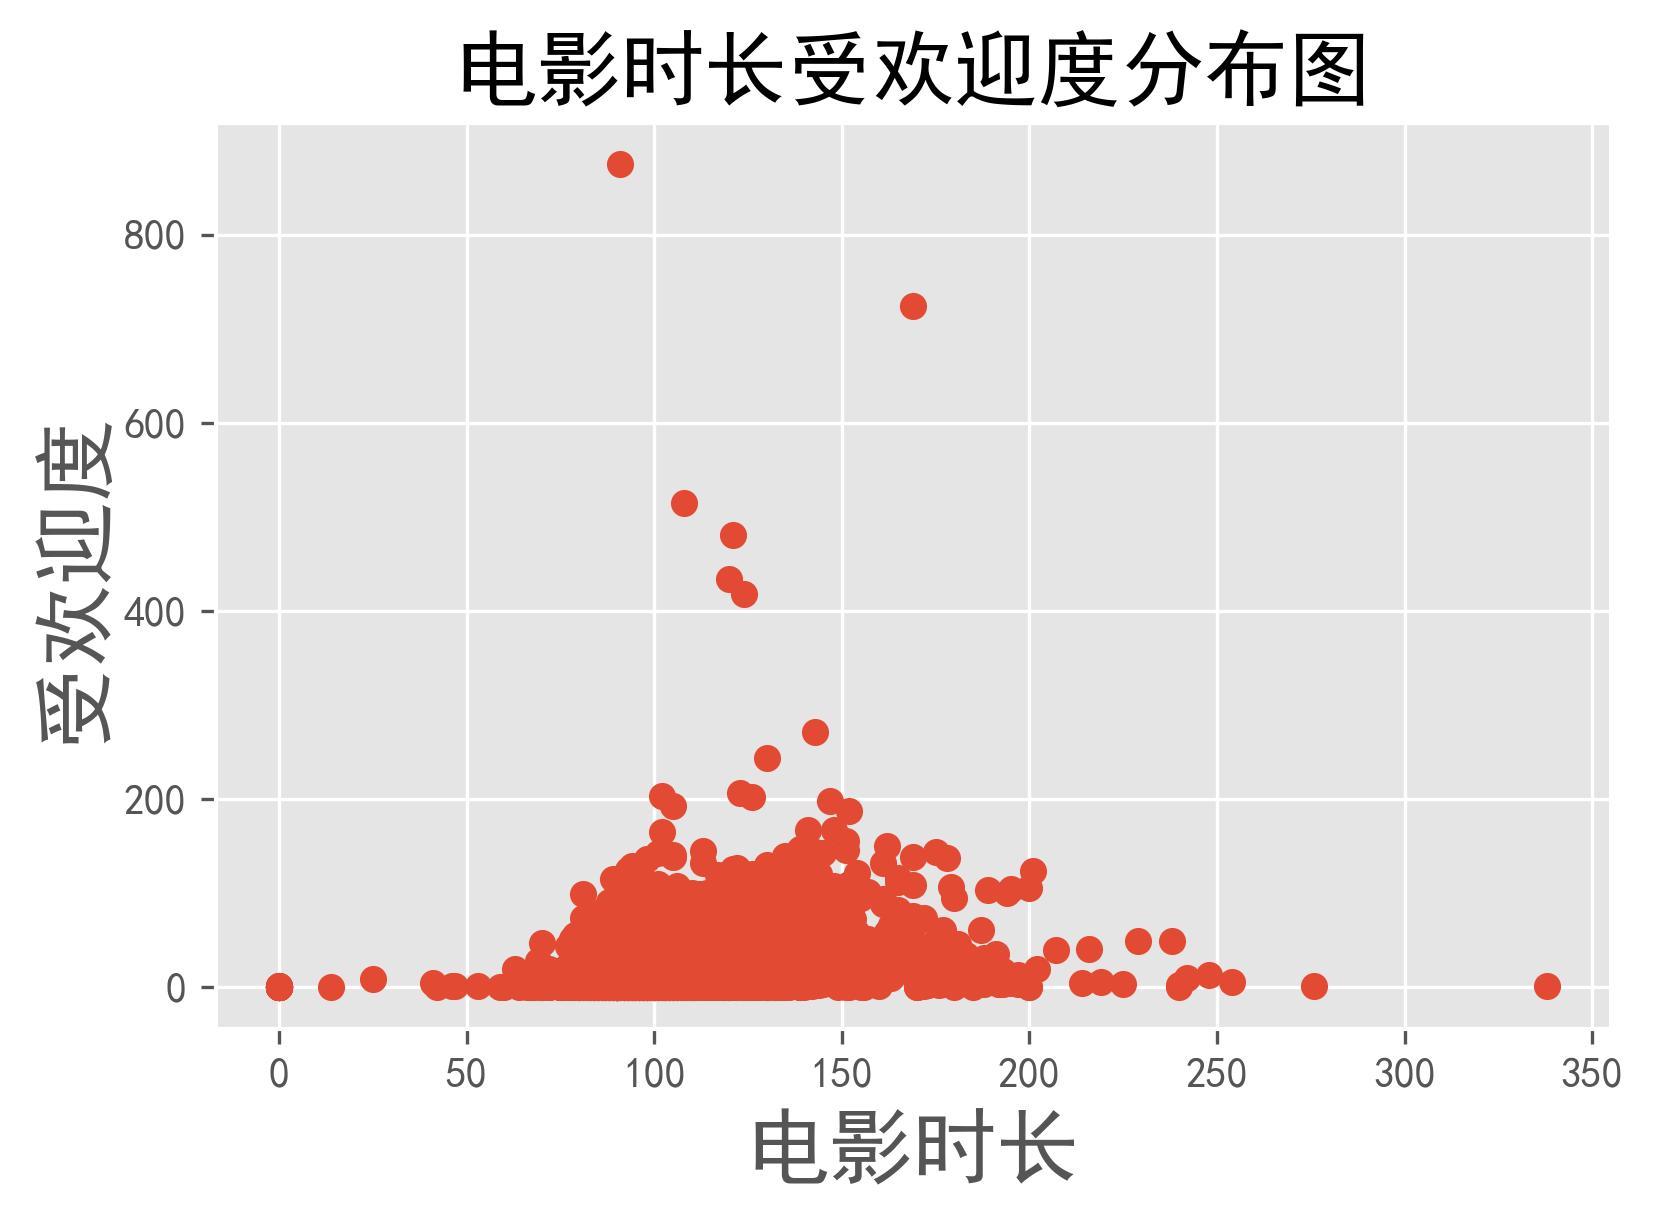

In [42]:
#电影时长与受欢迎度
plt.scatter(total.runtime,total.popularity)
plt.title('电影时长受欢迎度分布图',fontsize=20)
plt.xlabel('电影时长',fontsize=20)
plt.ylabel('受欢迎度',fontsize=20)
plt.savefig("picture/电影时长受欢迎度分布图.png",transparent = True)

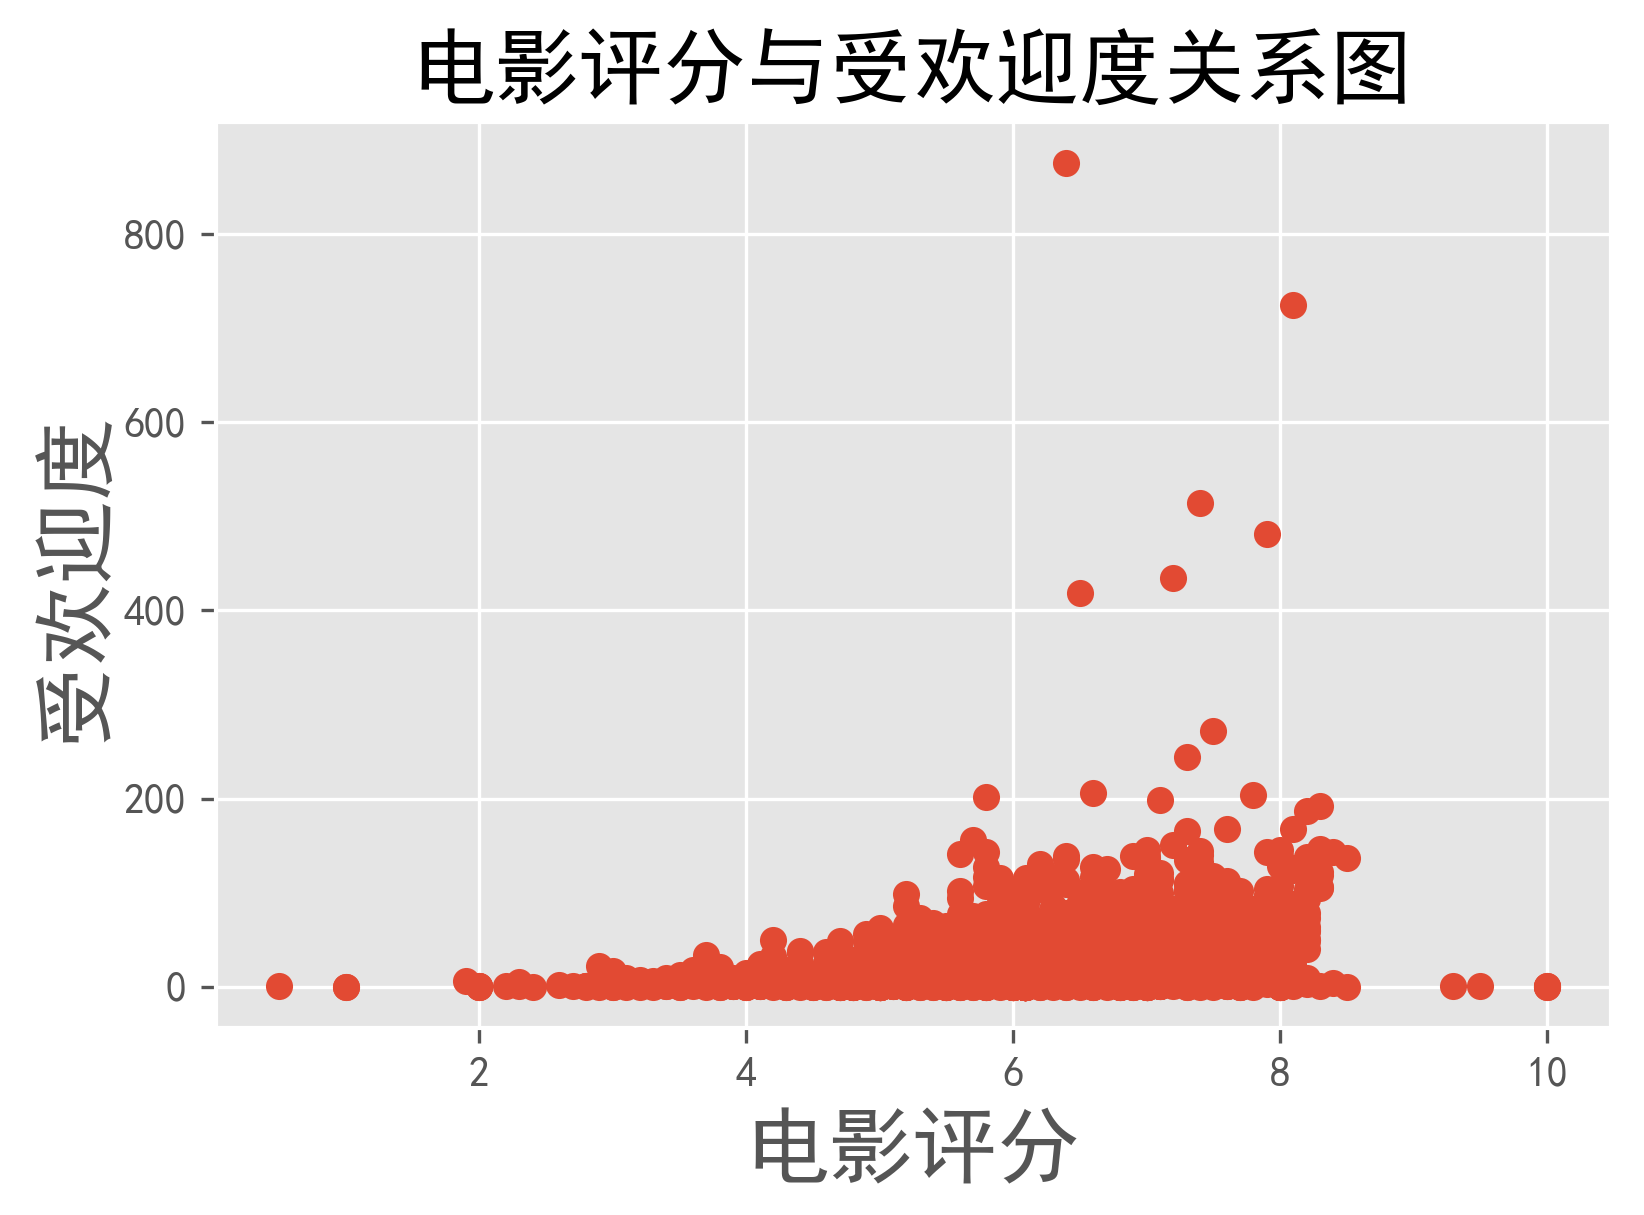

In [43]:
#电影评分与受欢迎度
plt.scatter(total.vote_average,total.popularity)
plt.title('电影评分与受欢迎度关系图',fontsize=20)
plt.xlabel('电影评分',fontsize=20)
plt.ylabel('受欢迎度',fontsize=20)
plt.savefig("picture/电影评分与受欢迎度关系图.png",transparent = True)

In [44]:
#Universal Pictures与Paramount Pictures两家巨头公司的业绩如何？
company_list=['Universal Pictures','Paramount Pictures']
company_df=pd.DataFrame()
for company in company_list:
    company_df[company]=total.production_companies.str.contains(company).map(lambda x:1 if x else 0)
company_df=pd.concat([company_df,genre_df.iloc[:,:-1],total.profit],axis=1)
company_df.head()

Universal Pictures  Paramount Pictures  Science Fiction  Mystery  Fantasy  \
0                   0                   0                1        0        1   
1                   0                   0                0        0        1   
2                   0                   0                0        0        0   
3                   0                   0                0        0        0   
4                   0                   0                1        0        0   

   Foreign  Adventure  History  Action  Family      ...       Documentary  \
0        0          1        0       1       0      ...                 0   
1        0          1        0       1       0      ...                 0   
2        0          1        0       1       0      ...                 0   
3        0          0        0       1       0      ...                 0   
4        0          1        0       1       0      ...                 0   

   Comedy  TV Movie  Drama  Horror  Western  War  Crime  Romance        profit  
0       0         0      0       0        0    0      0        0  2.550965e+09  
1       0         0      0       0        0    0      0        0  6.610000e+08  
2       0         0      0       0        0    0      1        0  6.356746e+08  
3       0         0      1       0        0    0      1        0  8.349391e+08  
4       0         0      0       0        0    0      0        0  2.413910e+07  

[5 rows x 23 columns]

In [45]:
#计算两家公司盈利总和：
list=[]
for company in company_list:
    list.append(company_df.groupby(company,as_index=False).profit.sum().loc[1,'profit'])
company_profit = pd.DataFrame(index=company_list)
company_profit['profit_total']=list
company_profit

profit_total
Universal Pictures  3.137083e+10
Paramount Pictures  2.978487e+10

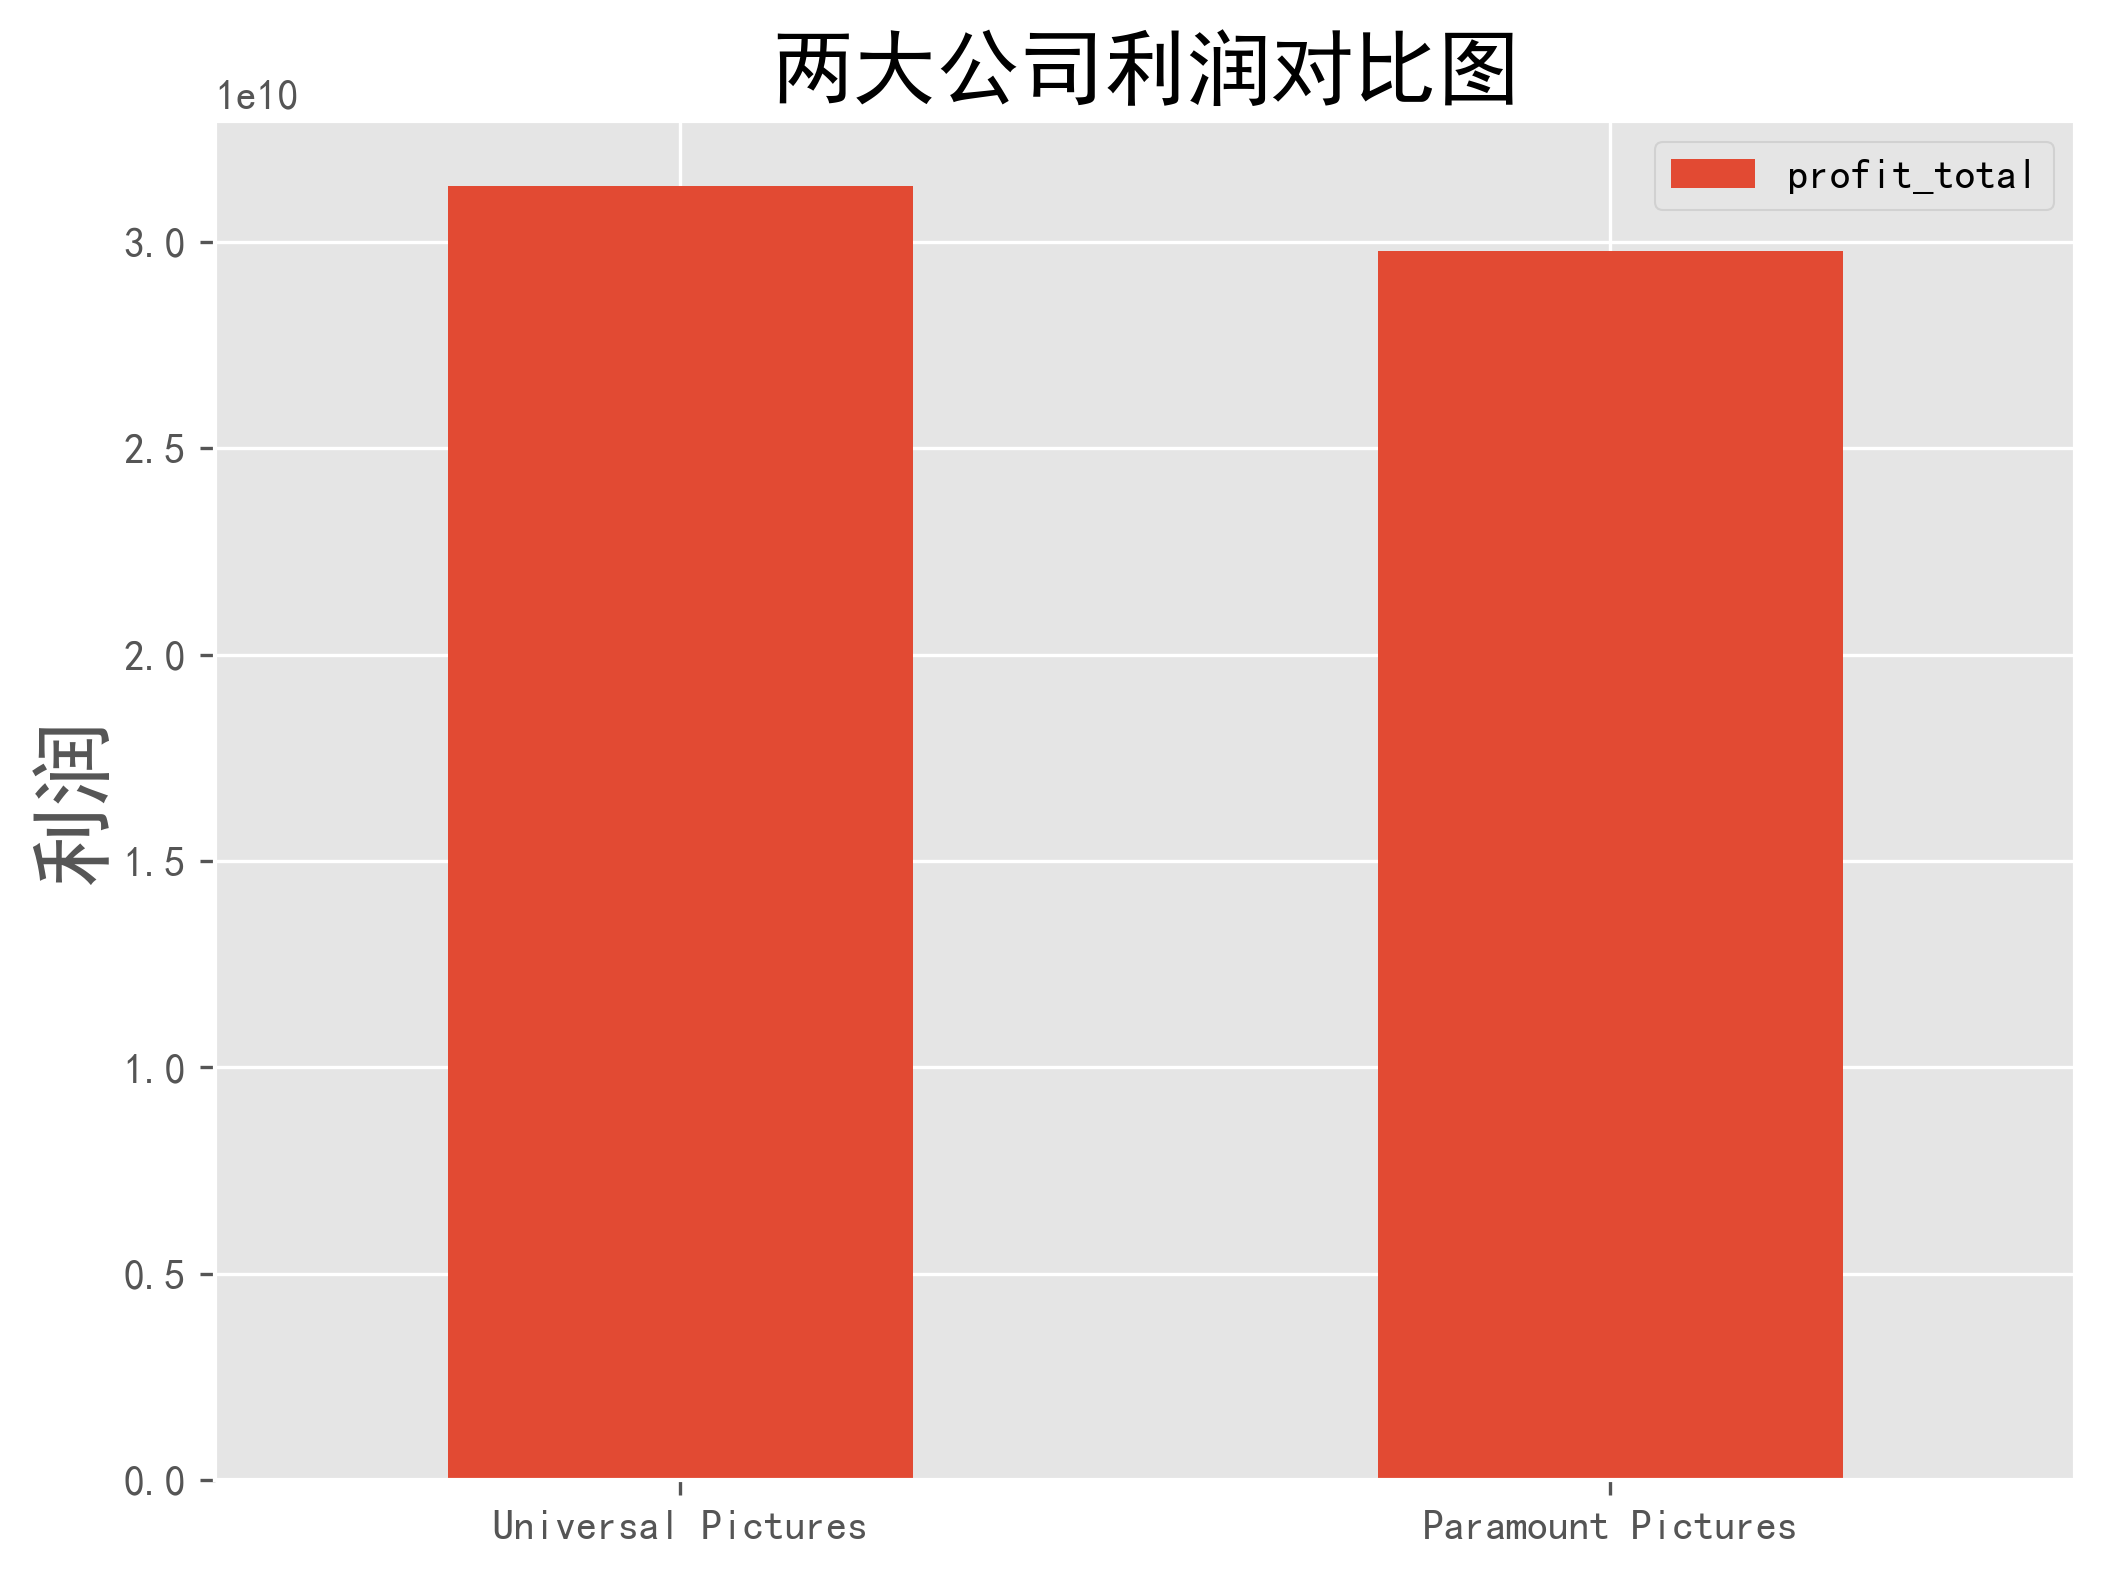

In [46]:
company_profit.plot.bar(label=company_profit.index,figsize=(8,6))
plt.title('两大公司利润对比图',fontsize=20)
plt.xticks(rotation=0)
plt.ylabel('利润',fontsize=20)
plt.savefig("picture/两大公司利润对比图.png",transparent = True)

In [47]:
company_list=['Universal Pictures','Paramount Pictures']
company_df=pd.DataFrame()
for company in company_list:
    company_df[company]=total.production_companies.str.contains(company).map(lambda x:1 if x else 0)
company_df=pd.concat([company_df,genre_df.iloc[:,:-1]],axis=1)
company_df.head()

Universal Pictures  Paramount Pictures  Science Fiction  Mystery  Fantasy  \
0                   0                   0                1        0        1   
1                   0                   0                0        0        1   
2                   0                   0                0        0        0   
3                   0                   0                0        0        0   
4                   0                   0                1        0        0   

   Foreign  Adventure  History  Action  Family   ...     Music  Documentary  \
0        0          1        0       1       0   ...         0            0   
1        0          1        0       1       0   ...         0            0   
2        0          1        0       1       0   ...         0            0   
3        0          0        0       1       0   ...         0            0   
4        0          1        0       1       0   ...         0            0   

   Comedy  TV Movie  Drama  Horror  Western  War  Crime  Romance  
0       0         0      0       0        0    0      0        0  
1       0         0      0       0        0    0      0        0  
2       0         0      0       0        0    0      1        0  
3       0         0      1       0        0    0      1        0  
4       0         0      0       0        0    0      0        0  

[5 rows x 22 columns]

In [48]:
#Universal Pictures公司的各电影类型
Uni_df=company_df.loc[company_df['Universal Pictures']==1]
Uni_df=Uni_df.drop(['Universal Pictures','Paramount Pictures'],axis=1)
#取数量最多的前十种电影类型
most1=Uni_df.sum().sort_values(ascending=False)[:10]

#Paramount Pictures公司的各电影类型
Par_df=company_df.loc[company_df['Paramount Pictures']==1]
Par_df=Par_df.drop(['Universal Pictures','Paramount Pictures'],axis=1)
#取数量最多的前十种电影类型
most2=Par_df.sum().sort_values(ascending=False)[:10]

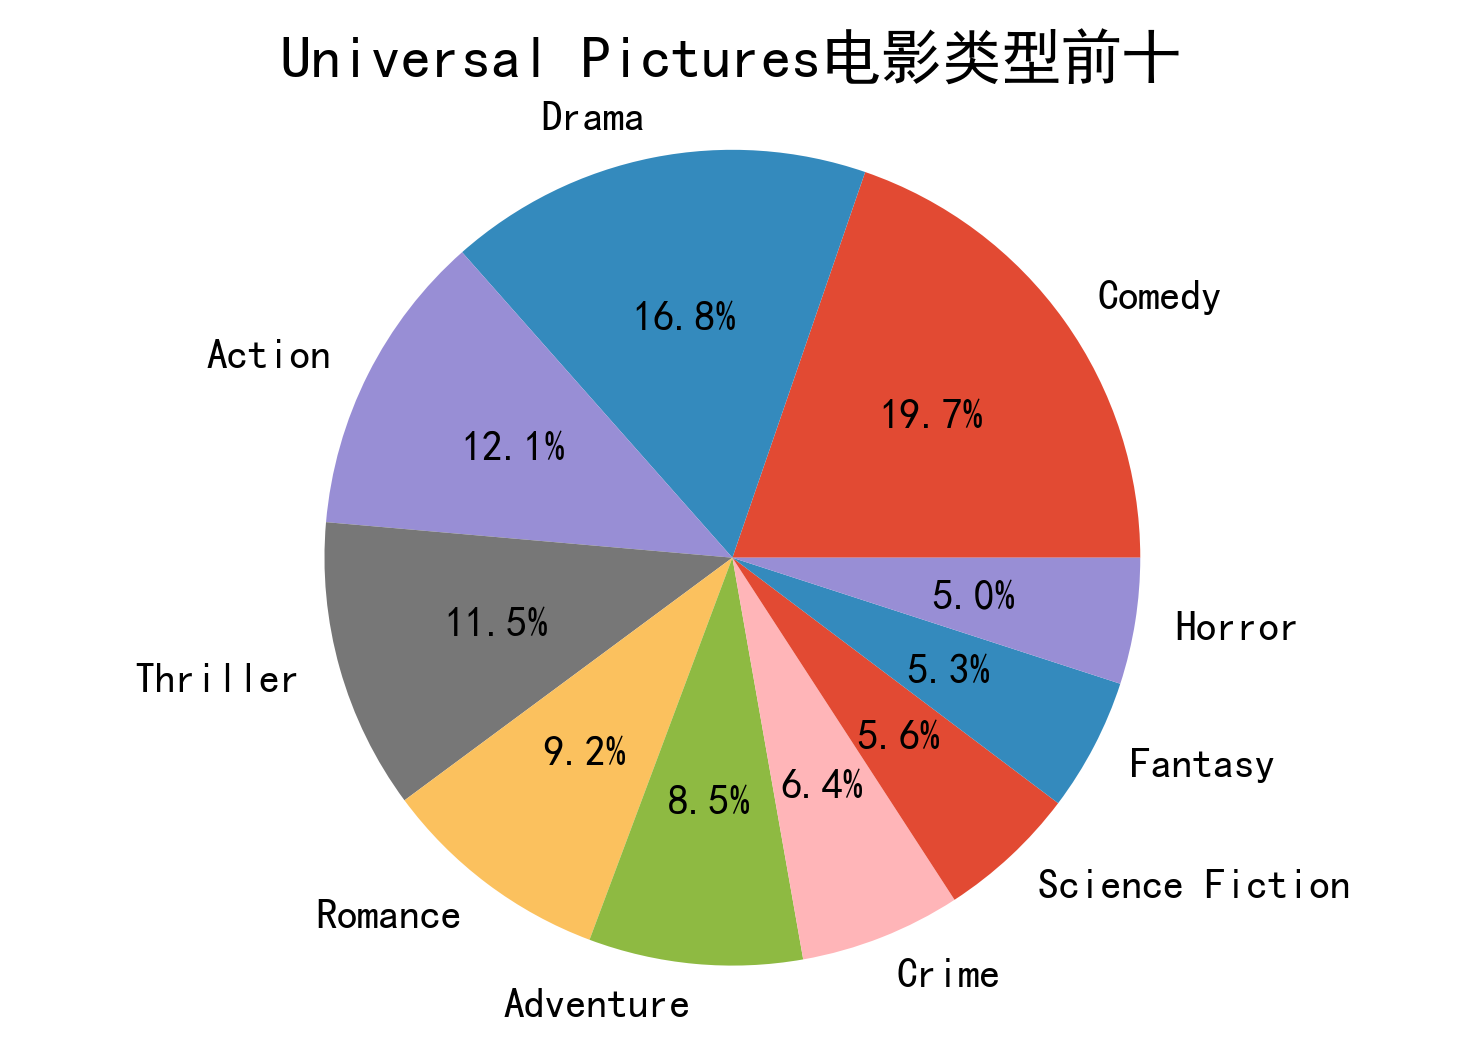

In [49]:
plt.style.use("ggplot")
# plt.rcParams['figure.dpi'] = 200 #图片像素
# plt.rcParams['figure.dpi'] = 200 #分辨率
plt.pie(x=most1.tolist(),labels=most1.index.tolist(),autopct='%.1f%%')
plt.axis('equal')
plt.title("Universal Pictures电影类型前十")
plt.savefig("picture/Universal电影类型前十.png",transparent = True)

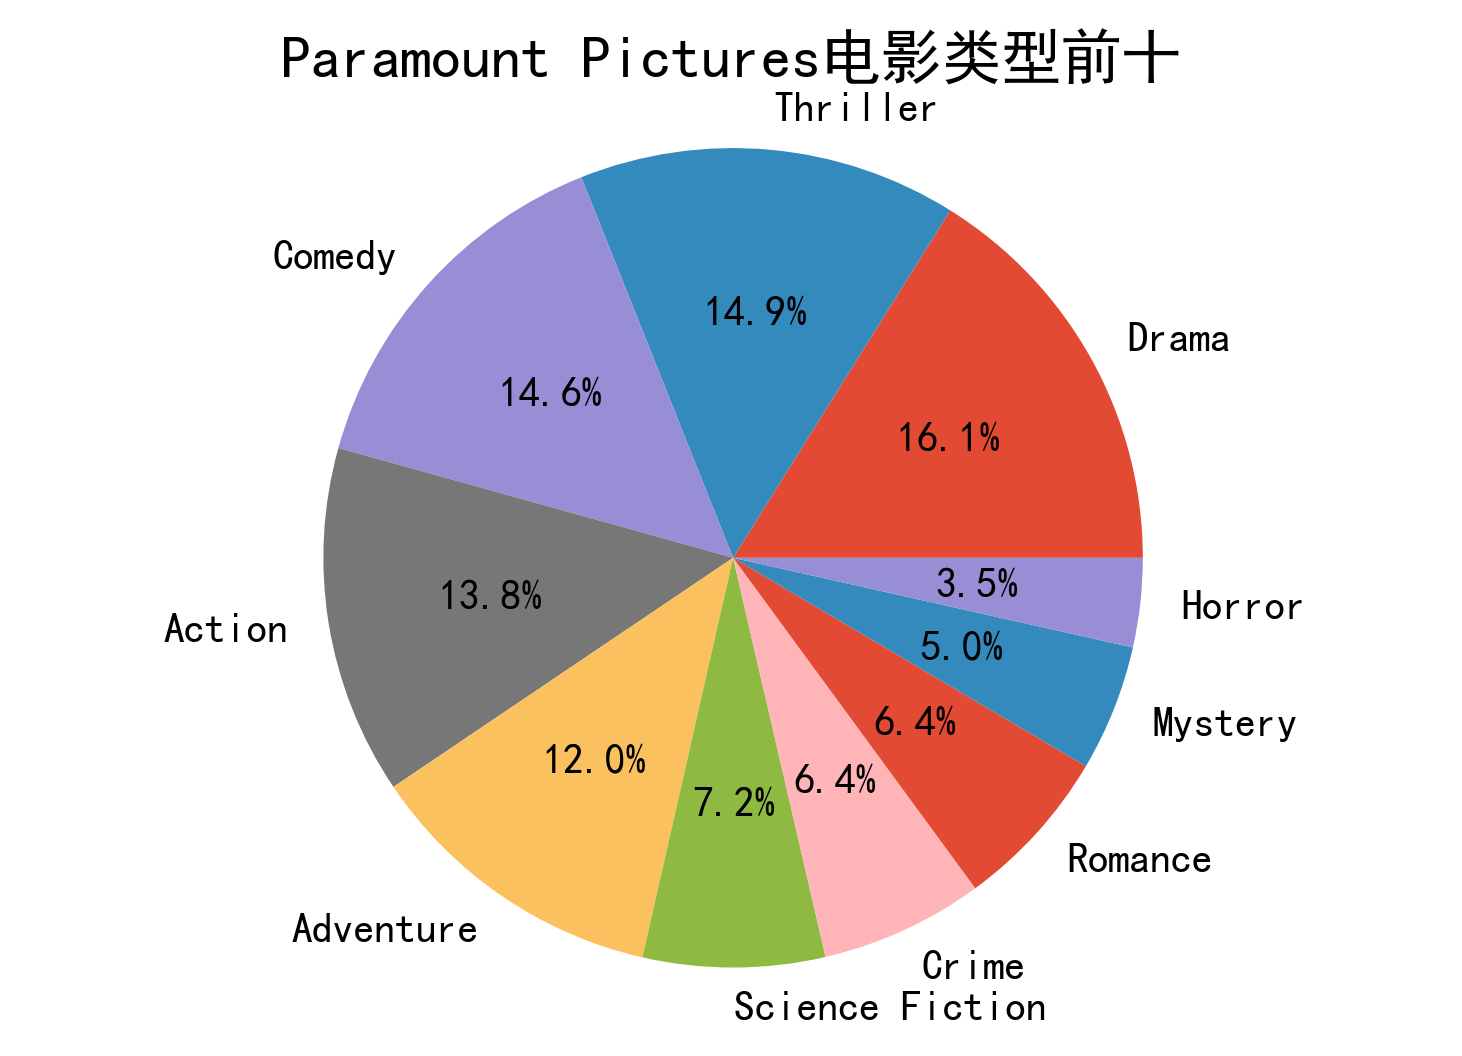

In [50]:
plt.pie(x=most2.tolist(),labels=most2.index.tolist(),autopct='%.1f%%')
plt.axis('equal')
plt.title("Paramount Pictures电影类型前十")
plt.savefig("picture/Paramount电影类型前十.png",transparent = True)

In [51]:
#（八）电影票房与哪些因素最相关
total[['budget','popularity','release_date','runtime','vote_average','vote_count','revenue']].corr()

budget  popularity  release_date   runtime  vote_average  \
budget        1.000000    0.458129      0.199788  0.222947      0.015722   
popularity    0.458129    1.000000      0.101853  0.223918      0.283173   
release_date  0.199788    0.101853      1.000000 -0.165604     -0.196502   
runtime       0.222947    0.223918     -0.165604  1.000000      0.349484   
vote_average  0.015722    0.283173     -0.196502  0.349484      1.000000   
vote_count    0.555316    0.774870      0.118748  0.261752      0.340800   
revenue       0.694865    0.599420      0.113480  0.205494      0.158390   

              vote_count   revenue  
budget          0.555316  0.694865  
popularity      0.774870  0.599420  
release_date    0.118748  0.113480  
runtime         0.261752  0.205494  
vote_average    0.340800  0.158390  
vote_count      1.000000  0.746262  
revenue         0.746262  1.000000

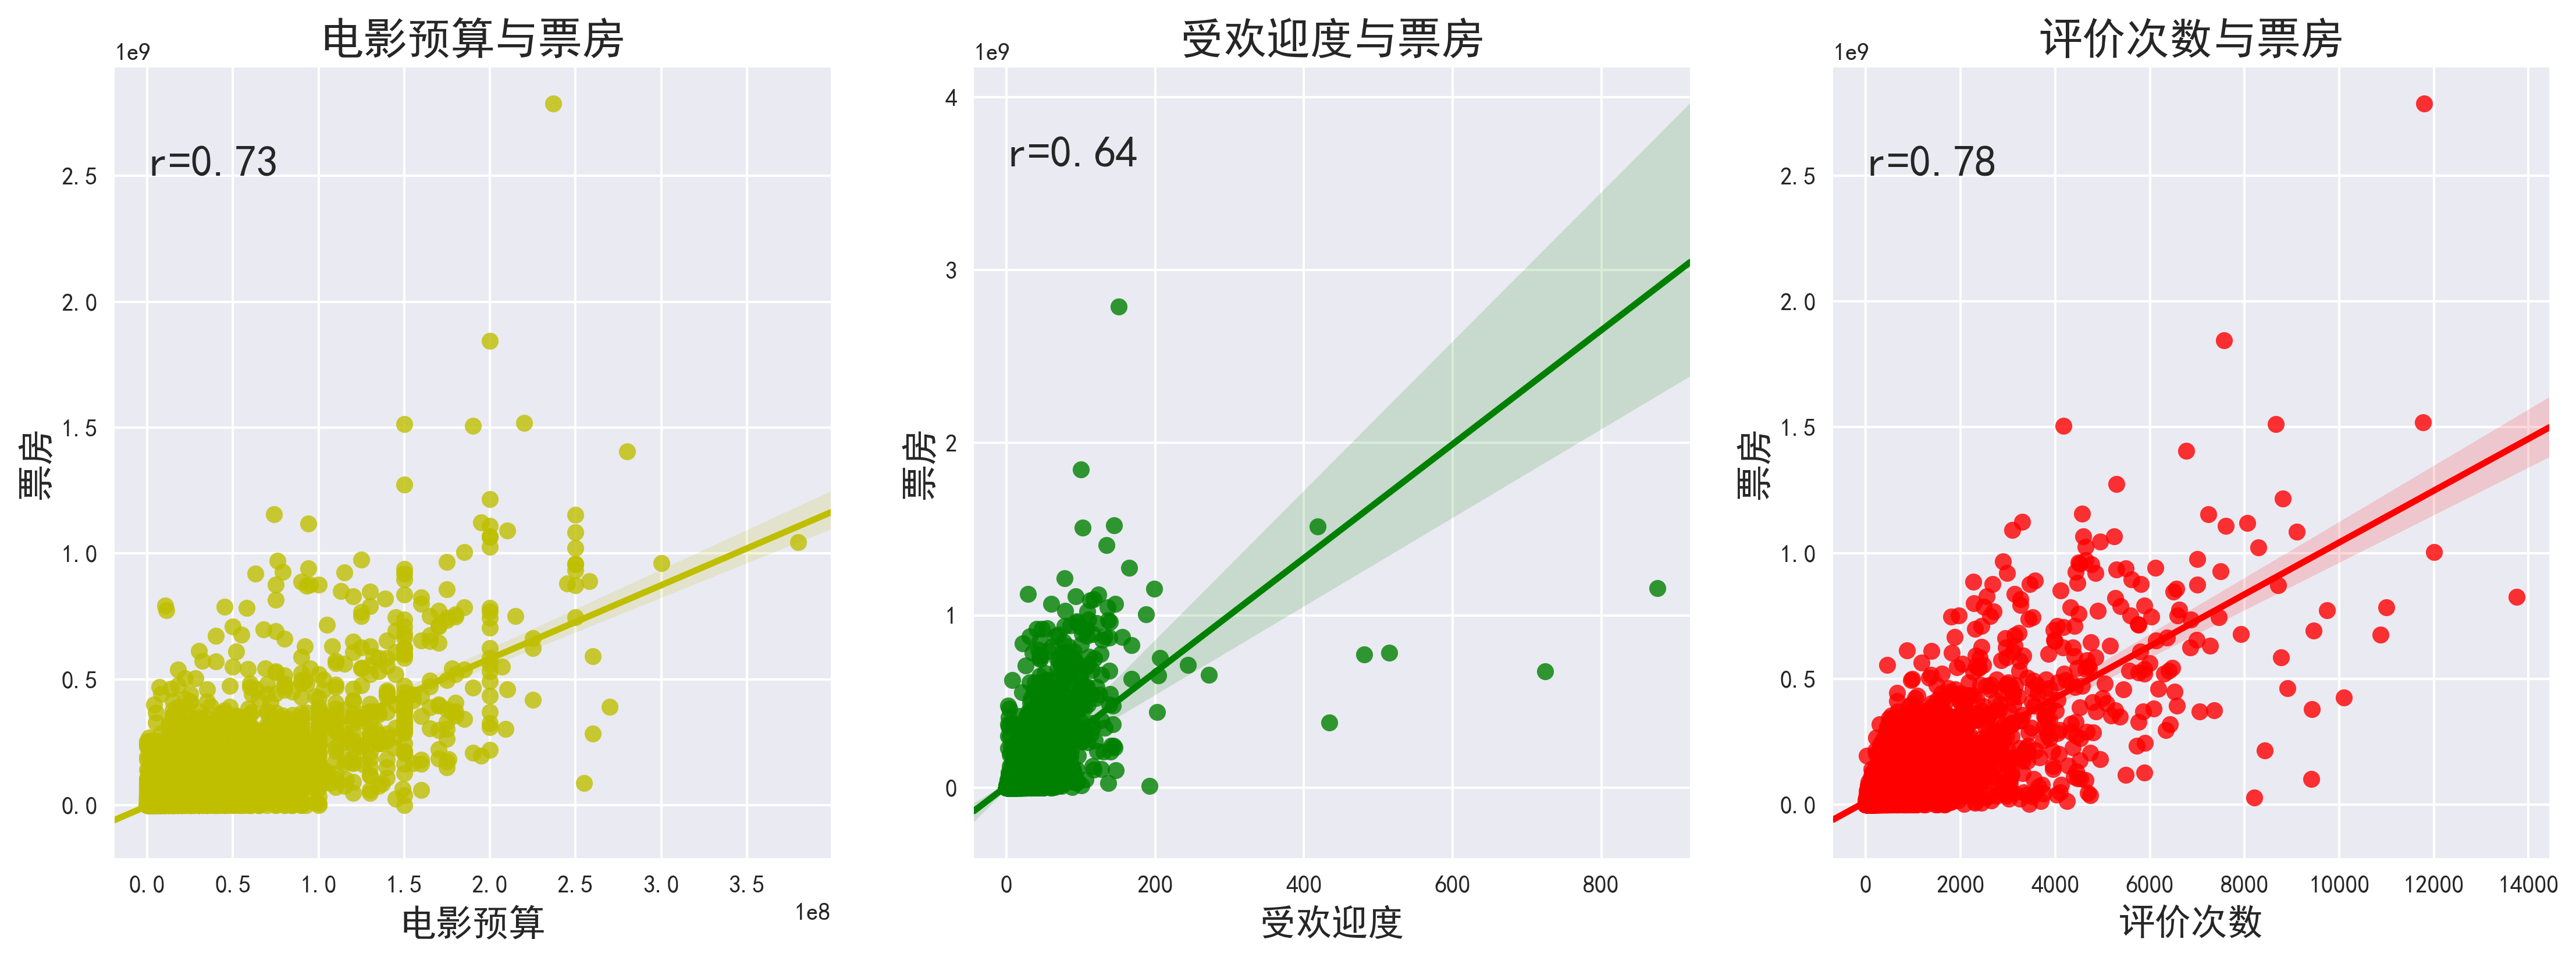

In [172]:
# import seaborn as sns
# plt.rcParams['font.sans-serif']=['SimHei']
revenue_corr= total[['budget','popularity','vote_count','revenue']]
fig=plt.figure(figsize=(18,6))
ax1=plt.subplot(1,3,1)
ax1=sns.regplot(x='budget',y='revenue',data=revenue_corr,x_jitter=.1,color='y')
ax1.text(0,2.5e9,'r=0.73',fontsize=18)
plt.title("电影预算与票房",fontsize=18)
plt.xlabel("电影预算",fontsize=15)
plt.ylabel("票房",fontsize=15)

ax2=plt.subplot(1,3,2)
ax2=sns.regplot(x='popularity',y='revenue',data=revenue_corr,x_jitter=.1,color='g')
ax2.text(0,3.6e9,'r=0.64',fontsize=18)
plt.title("受欢迎度与票房",fontsize=18)
plt.xlabel("受欢迎度",fontsize=15)
plt.ylabel("票房",fontsize=15)

ax3=plt.subplot(1,3,3)
ax3=sns.regplot(x='vote_count',y='revenue',data=revenue_corr,x_jitter=.1,color='r')
ax3.text(0,2.5e9,'r=0.78',fontsize=18)
plt.title("评价次数与票房",fontsize=18)
plt.xlabel("评价次数",fontsize=15)
plt.ylabel("票房",fontsize=15)